<a href="https://colab.research.google.com/github/marcomoldovan/hierarchical-text-encoder/blob/master/hierarchical_transformer_based_document_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Transformer-based Text Encoder** 

We present the multi-purpose Hierarchical Attention-based Text Encoder (HATE), a language model for learning long-form document representations and contextualized sentence representations. Our model employs a Transformer module on two separate levels with the goal of capturing contextual information between words as well as between sentences. Our model offers theoretical plausibility from a linguistic point of view as we are essentially trying to model multi-level compositionality. We introduce a pre-training scheme that uses masked language modeling on two levels in order to train the model to capture general linguistic features. After that we fine-tune our model on a document ranking task using the MS MARCO dataset which allows us to compare our performance to many other models. We detect baseline-beating performance in our fine-tuned models but suspect severe undertraining. Later in this work we will explore the contextual interactions and resulting representations visually.

# **1.** Introduction



# **2.** Background

## 2.1 Statistical foundations of machine learning

(1) https://towardsdatascience.com/the-statistical-foundations-of-machine-learning-973c356a95f

More on regression, classification, etc. in a probabilistic context. Show that these problems are essentially MAP.

## 2.2 Mathematics of optimization for deep learning

(1) https://towardsdatascience.com/the-mathematics-of-optimization-for-deep-learning-11af2b1fda30

- Optimization: (1) visualizing loss landscape https://arxiv.org/pdf/1712.09913.pdf
- Momentum based optimizers
- Dropout (1) https://arxiv.org/pdf/1207.0580.pdf
- Batch normalization (1) https://arxiv.org/abs/1502.03167 (2) https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf
- Weight initialization
- Reguralization (1) NLP specific: https://mlexplained.com/2018/03/02/regularization-techniques-for-natural-language-processing-with-code-examples/

## 2.3 Representation Learning

Touch briefly on the theory of representation learning, independent of language. Main focus on the Bengio paper: https://arxiv.org/pdf/1206.5538.pdf Also refer to representation learning slides from DL&AI course from last semester as an appropriate introduction.

## 2.4 Language Models

- Language modeling via auto-encoding or auto-regressive methods in general


- Embeddings in Language Models (1) https://jalammar.github.io/skipgram-recommender-talk/Text (2) https://dspace.mit.edu/handle/1721.1/118079
-  Word embeddings (1) https://ruder.io/word-embeddings-1/index.html (2) https://ruder.io/word-embeddings-softmax/index.html (3) https://ruder.io/secret-word2vec/index.html (4) https://ruder.io/word-embeddings-2017/index.html (5) https://jalammar.github.io/illustrated-word2vec/ (6) Glove https://mlexplained.com/2018/04/29/paper-dissected-glove-global-vectors-for-word-representation-explained/ (7) ELMo https://mlexplained.com/2018/06/15/paper-dissected-deep-contextualized-word-representations-explained/ (8) https://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html (9) https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html#loss-functions
- Sentence embeddings (1) https://supernlp.github.io/2018/11/26/sentreps/ (2) https://mlexplained.com/2017/12/28/an-overview-of-sentence-embedding-methods/ (3) https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a
- Document Embeddings (1) https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d#1409 (2) https://graphaware.com/nlp/2018/09/03/advanced-document-representation.html

- General early language models that are based on DL: RNNs/LSTM (touch shortly) (1) https://arxiv.org/pdf/1312.6026.pdf (2) https://distill.pub/2019/memorization-in-rnns/
- On the diffictuly of training recurrent neural networks https://arxiv.org/pdf/1211.5063.pdf
- Transition to attention mechanism, at first in RNNs
- Why these large DL-based models are so important for transfer learning in NLP (1) https://ruder.io/transfer-learning/ (2) https://thegradient.pub/nlp-imagenet/ (3) very linguistic study of word embeddings for transfer tasks https://arxiv.org/pdf/1903.08855.pdf

# **3.** Related Work

## 3.1 Attention and why it's all you need

- Attention is all you need (1) https://mlexplained.com/2017/12/29/attention-is-all-you-need-explained/ (2) https://arxiv.org/pdf/1706.03762.pdf (3) https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec (4) https://blog.floydhub.com/attention-mechanism/ (5) https://jalammar.github.io/illustrated-transformer/ (6) https://distill.pub/2016/augmented-rnns/ (7) https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html
- BERT (1) https://mlexplained.com/2019/01/07/paper-dissected-bert-pre-training-of-deep-bidirectional-transformers-for-language-understanding-explained/ (2) https://arxiv.org/pdf/1810.04805.pdf (3) https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/ (4) https://jalammar.github.io/illustrated-bert/
- What Does BERT Look At? An Analysis of BERT’s Attention 
https://arxiv.org/pdf/1906.04341.pdf https://arxiv.org/abs/1909.10430v2
- BERT raw embeddings https://arxiv.org/abs/1909.00512v1 https://towardsdatascience.com/examining-berts-raw-embeddings-fd905cb22df7
- Sentence embeddings revisited: BERT methods -> transition to intuition for my document representation model
- Call-back to section 2.4 where I touch on classical embeddings and compare to deep, high-parameter, attention based models such as BERT
- Why these large pretrained models are so important for transfer learning in NLP (1) https://ruder.io/transfer-learning/ (2) https://thegradient.pub/nlp-imagenet/


## 3.2 Hierarchical Attention-Models

- SMITH (1) https://arxiv.org/pdf/2004.12297v1.pdf (2) https://github.com/dmolony3/SMITH
- HIBERT (1) https://arxiv.org/pdf/1905.06566.pdf (2) https://github.com/liangsi03/hibert_model

## 3.3 Information Retrieval

- TANDA: Transfer and Adapt Pre-Trained Transformer Modelsfor Answer Sentence Selection https://arxiv.org/pdf/1911.04118.pdf

# **4.** The Model

#### Basic imports and installs

Introduce all necessary top-level imports and install the transformer module from huggingface

In [1]:
!pip install transformers #installs transformer module from huggingface
!pip install datasets #installs dataset module from huggingface
!pip install tokenizers #installs tokenizer module from huggingface
!pip install torchsummary #for easy inspection of model/layer sizes and shapes
!pip install bertviz #for attention weight visualization

import re
import os
import math
import time
import pickle
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize
nltk.download('punkt')

import torch
import torch.nn as nn
import torch.nn.functional as f
import torchtext.datasets
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import transformers
from transformers import BertConfig, BertModel, BertForMaskedLM
from transformers.models.bert.modeling_bert import BertPreTrainedModel
from transformers import configuration_utils
from transformers.activations import ACT2FN 
from transformers.file_utils import ModelOutput
from transformers.modeling_utils import (PreTrainedModel, 
                                         apply_chunking_to_forward, 
                                         find_pruneable_heads_and_indices,
                                         prune_linear_layer,)
from transformers.configuration_utils import PretrainedConfig

from datasets import load_dataset

from torchsummary import summary

from bertviz import head_view
from bertviz import model_view
from bertviz import neuron_view

import plotly
import plotly.graph_objs as go
from sklearn.decomposition import PCA

from pprint import pprint
from typing import Any, Callable, Dict, List, NewType, Optional, Tuple, Union

     |████████████████████████████████| 2.1MB 10.0MB/s 
     |████████████████████████████████| 3.3MB 53.2MB/s 
     |████████████████████████████████| 870kB 62.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=227a1df1a8a70270f182bc580b8b27839fbe2c6d787d978ea6ad5c339308576c
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses
     |████████████████████████████████| 194kB 7.9MB/s 
     |████████████████████████████████| 112kB 47.1MB/s 
     |████████████████████████████████| 245kB 52.0MB/s 
     |████████████████████████████████| 163kB 9.0MB/s 
     |████████████████████████████████| 1.2MB 14.3MB/s 
     |████████████████████████████████| 133kB 36.2MB/s 
     |████████████████████████████████| 7.4MB 30.0MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
ERROR: botocore 1.20.53 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.

## 4.1 Transformer

#### Internal Embedding Lookup

In [2]:
class EmbeddingsLookup(nn.Module):
  def __init__(self, config):
    super().__init__()
    # Initialize the lookup matrix for input IDs, positional embeddings and token types
    self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=config.pad_token_id)
    self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
    self.token_type_embeddings = nn.Embedding(config.type_vocab_size, config.hidden_size)
    
    # Adds to Layer Normalization and Dropout on inital word embeddings
    self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

    # position_ids (1, len position emb) is contiguous in memory and exported when serialized
    self.register_buffer("position_ids", torch.arange(config.max_position_embeddings).expand((1, -1)))
    self.position_embedding_type = getattr(config, "position_embedding_type", "absolute")

  def forward(self, input_ids=None, token_type_ids=None, position_ids=None, inputs_embeds=None):
    if input_ids is not None:
      input_shape = input_ids.size()
    else:
      input_shape = inputs_embeds.size()[:-1]

    seq_length = input_shape[1]

    if position_ids is None:
      position_ids = self.position_ids[:, :seq_length]

    if token_type_ids is None:
      token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=self.position_ids.device)

    if inputs_embeds is None:
      inputs_embeds = self.word_embeddings(input_ids)
    token_type_embeddings = self.token_type_embeddings(token_type_ids)

    embeddings = inputs_embeds + token_type_embeddings
    if self.position_embedding_type == "absolute":
      position_embeddings = self.position_embeddings(position_ids)
      embeddings += position_embeddings
    embeddings = self.LayerNorm(embeddings)
    embeddings = self.dropout(embeddings)
    return embeddings

#### Autoencoder

In [3]:
class EncoderMLP(nn.Module):
  def __init__(self, config, preembedded_hidden_size):
    super().__init__()

    num_steps = 3
    step_size = (preembedded_hidden_size-config.hidden_size)//num_steps

    intermediary_1 = config.hidden_size + (num_steps-1)*step_size
    intermediary_2 = config.hidden_size + (num_steps-2)*step_size

    self.encoder = nn.Sequential(
        nn.Linear(preembedded_hidden_size, intermediary_1),
        nn.ReLU(),
        nn.Linear(intermediary_1, intermediary_2),
        nn.ReLU(),
        nn.Linear(intermediary_2, config.hidden_size)
    )

  def forward(self, hidden_states):
    outputs = self.encoder(hidden_states)
    return outputs


class DecoderMLP(nn.Module):
  def __init__(self, config, preembedded_hidden_size):
    super().__init__()

    num_steps = 3
    step_size = (preembedded_hidden_size-config.hidden_size)//num_steps

    intermediary_1 = config.hidden_size + (num_steps-1)*step_size
    intermediary_2 = config.hidden_size + (num_steps-2)*step_size

    self.decoder = nn.Sequential(
        nn.Linear(config.hidden_size, intermediary_2),
        nn.ReLU(),
        nn.Linear(intermediary_2, intermediary_1),
        nn.ReLU(),
        nn.Linear(intermediary_1, preembedded_hidden_size)
    )

  def forward(self, hidden_states):
    outputs = self.decoder(hidden_states)
    return outputs

#### Encoder Stack

In [4]:
class BaseModelOutputWithCrossAttentions(ModelOutput):
    """
    Base class for model's outputs, with potential hidden states and attentions.
    Args:
        last_hidden_state (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`):
            Sequence of hidden-states at the output of the last layer of the model.
        hidden_states (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_hidden_states=True`` is passed or when ``config.output_hidden_states=True``):
            Tuple of :obj:`torch.FloatTensor` (one for the output of the embeddings + one for the output of each layer)
            of shape :obj:`(batch_size, sequence_length, hidden_size)`.
            Hidden-states of the model at the output of each layer plus the initial embedding outputs.
        attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` is passed or when ``config.output_attentions=True``):
            Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
            sequence_length, sequence_length)`.
            Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
            heads.
        cross_attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` and ``config.add_cross_attention=True`` is passed or when ``config.output_attentions=True``):
            Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
            sequence_length, sequence_length)`.
            Attentions weights of the decoder's cross-attention layer, after the attention softmax, used to compute the
            weighted average in the cross-attention heads.
    """

    last_hidden_state: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None
    cross_attentions: Optional[Tuple[torch.FloatTensor]] = None

In [5]:
class SelfAttention(nn.Module):
  def __init__(self, config):
    super().__init__()
    if config.hidden_size % config.num_attention_heads != 0 and not hasattr(config, "embedding_size"):
      raise ValueError(
        "The hidden size (%d) is not a multiple of the number of attention "
        "heads (%d)" % (config.hidden_size, config.num_attention_heads)
      )

    self.num_attention_heads = config.num_attention_heads
    self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
    self.all_head_size = self.num_attention_heads * self.attention_head_size

    self.query = nn.Linear(config.hidden_size, self.all_head_size)
    self.key = nn.Linear(config.hidden_size, self.all_head_size)
    self.value = nn.Linear(config.hidden_size, self.all_head_size)

    self.dropout = nn.Dropout(config.attention_probs_dropout_prob)
    self.position_embedding_type = getattr(config, "position_embedding_type", "absolute")
    if self.position_embedding_type == "relative_key" or self.position_embedding_type == "relative_key_query":
      self.max_position_embeddings = config.max_position_embeddings
      self.distance_embedding = nn.Embedding(2 * config.max_position_embeddings - 1, self.attention_head_size)

  def transpose_for_scores(self, x):
    new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
    x = x.view(*new_x_shape)
    return x.permute(0, 2, 1, 3)

  def forward(self,
              hidden_states,
              attention_mask=None,
              head_mask=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=False):
    
    mixed_query_layer = self.query(hidden_states)

    # If this is instantiated as a cross-attention module, the keys
    # and values come from an encoder; the attention mask needs to be
    # such that the encoder's padding tokens are not attended to.
    if encoder_hidden_states is not None:
        mixed_key_layer = self.key(encoder_hidden_states)
        mixed_value_layer = self.value(encoder_hidden_states)
        attention_mask = encoder_attention_mask
    else:
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)

    query_layer = self.transpose_for_scores(mixed_query_layer)    
    key_layer = self.transpose_for_scores(mixed_key_layer)
    value_layer = self.transpose_for_scores(mixed_value_layer)

    # Take the dot product between "query" and "key" to get the raw attention scores.
    attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))

    if self.position_embedding_type == "relative_key" or self.position_embedding_type == "relative_key_query":
      seq_length = hidden_states.size()[1]
      position_ids_l = torch.arange(seq_length, dtype=torch.long, device=hidden_states.device).view(-1, 1)
      position_ids_r = torch.arange(seq_length, dtype=torch.long, device=hidden_states.device).view(1, -1)
      distance = position_ids_l - position_ids_r
      positional_embedding = self.distance_embedding(distance + self.max_position_embeddings - 1)
      positional_embedding = positional_embedding.to(dtype=query_layer.dtype)  # fp16 compatibility

      if self.position_embedding_type == "relative_key":
        relative_position_scores = torch.einsum("bhld,lrd->bhlr", query_layer, positional_embedding)
        attention_scores = attention_scores + relative_position_scores
      elif self.position_embedding_type == "relative_key_query":
        relative_position_scores_query = torch.einsum("bhld,lrd->bhlr", query_layer, positional_embedding)
        relative_position_scores_key = torch.einsum("bhrd,lrd->bhlr", key_layer, positional_embedding)
        attention_scores = attention_scores + relative_position_scores_query + relative_position_scores_key

    attention_scores = attention_scores / math.sqrt(self.attention_head_size)
    if attention_mask is not None:
      # Apply the attention mask is (precomputed for all layers in BertModel forward() function)
      attention_scores = attention_scores + attention_mask

    # Normalize the attention scores to probabilities.
    attention_probs = nn.Softmax(dim=-1)(attention_scores)

    # This is actually dropping out entire tokens to attend to, which might
    # seem a bit unusual, but is taken from the original Transformer paper.
    attention_probs = self.dropout(attention_probs)

    # Mask heads if we want to
    if head_mask is not None:
      attention_probs = attention_probs * head_mask

    context_layer = torch.matmul(attention_probs, value_layer)

    context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
    new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
    context_layer = context_layer.view(*new_context_layer_shape)

    outputs = (context_layer, attention_probs) if output_attentions else (context_layer,)
    return outputs
  

class SelfOutput(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.dense = nn.Linear(config.hidden_size, config.hidden_size)
    self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, hidden_states, input_tensor):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.dropout(hidden_states)
    hidden_states = self.LayerNorm(hidden_states + input_tensor)
    return hidden_states


class AttentionModule(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.self = SelfAttention(config)
    self.output = SelfOutput(config)
    self.pruned_heads = set()

  def prune_head(self, heads):
    if len(heads) == 0:
      return
    heads, index = find_pruneable_heads_and_indices(                            
      heads, self.self.num_attention_heads, self.self.attention_head_size, self.pruned_heads
    )
    # Prune linear layers
    self.self.query = prune_linear_layer(self.self.query, index)
    self.self.key = prune_linear_layer(self.self.key, index)
    self.self.value = prune_linear_layer(self.self.value, index)
    self.output.dense = prune_linear_layer(self.output.dense, index, dim=1)

    # Update hyper params and store pruned heads
    self.self.num_attention_heads = self.self.num_attention_heads - len(heads)
    self.self.all_head_size = self.self.attention_head_size * self.self.num_attention_heads
    self.pruned_heads = self.pruned_heads.union(heads)

  def forward(self,
              hidden_states,
              attention_mask=None,
              head_mask=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=False):
    self_outputs = self.self(
            hidden_states,
            attention_mask,
            head_mask,
            encoder_hidden_states,
            encoder_attention_mask,
            output_attentions)
    attention_output = self.output(self_outputs[0], hidden_states)
    outputs = (attention_output,) + self_outputs[1:]  # add attentions if we output them
    return outputs





class FeedForward(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.dense = nn.Linear(config.hidden_size, config.intermediate_size)
    if isinstance(config.hidden_act, str):
      self.intermediate_act_fn = ACT2FN[config.hidden_act]
    else:
      self.intermediate_act_fn = config.hidden_act

  def forward(self, hidden_states):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.intermediate_act_fn(hidden_states)
    return hidden_states


class Output(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.dense = nn.Linear(config.intermediate_size, config.hidden_size)
    self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
    self.dropout = nn.Dropout(config.hidden_dropout_prob)

  def forward(self, hidden_states, input_tensor):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.dropout(hidden_states)
    hidden_states = self.LayerNorm(hidden_states + input_tensor)
    return hidden_states





class EncoderLayer (nn.Module):
  def __init__(self, config):
    super().__init__()
    self.chunk_size_feed_forward = config.chunk_size_feed_forward
    self.seq_len_dim = 1
    self.attention = AttentionModule(config)
    self.is_decoder = config.is_decoder
    self.add_cross_attention = config.add_cross_attention
    if self.add_cross_attention:
      assert self.is_decoder, f"{self} should be used as a decoder model if cross attention is added"
      self.crossattention = AttentionModule(config)
    self.intermediate = FeedForward(config)
    self.output = Output(config)

  def forward(self,
              hidden_states,
              attention_mask=None,
              head_mask=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=False):
    
    self_attention_outputs = self.attention(hidden_states,
                                            attention_mask,
                                            head_mask,
                                            output_attentions=output_attentions)
    attention_output = self_attention_outputs[0]
    outputs = self_attention_outputs[1:]  # add self attentions if we output attention weights
    if self.is_decoder and encoder_hidden_states is not None:
      assert hasattr(self, "crossattention"), f"If `encoder_hidden_states` are passed, {self} has to be instantiated with cross-attention layers by setting `config.add_cross_attention=True`"
      cross_attention_outputs = self.crossattention(attention_output,
                                                    attention_mask,
                                                    head_mask,
                                                    encoder_hidden_states,
                                                    encoder_attention_mask,
                                                    output_attentions)
      attention_output = cross_attention_outputs[0]
      outputs = outputs + cross_attention_outputs[1:]  # add cross attentions if we output attention weights

    layer_output = apply_chunking_to_forward(self.feed_forward_chunk,           # don't forget this!!
                                             self.chunk_size_feed_forward, 
                                             self.seq_len_dim, attention_output)
      
    outputs = (layer_output,) + outputs
    return outputs

  def feed_forward_chunk(self, attention_output):
    intermediate_output = self.intermediate(attention_output)
    layer_output = self.output(intermediate_output, attention_output)
    return layer_output




class EncoderStack(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.config = config
    self.layer = nn.ModuleList([EncoderLayer(config) for _ in range(config.num_hidden_layers)])

  def forward(self,
              hidden_states,
              attention_mask=None,
              head_mask=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=False,
              output_hidden_states=False,
              return_dict=True):
    all_hidden_states = () if output_hidden_states else None
    all_self_attentions = () if output_attentions else None
    all_cross_attentions = () if output_attentions and self.config.add_cross_attention else None
    for i, layer_module in enumerate(self.layer):
      if output_hidden_states:
        all_hidden_states = all_hidden_states + (hidden_states,)
      
      layer_head_mask = head_mask[i] if head_mask is not None else None

      if getattr(self.config, "gradient_checkpointing", False):
        def create_custom_forward(module):
          def custom_forward(*inputs):
            return module(*inputs, output_attentions)
          return custom_forward
        layer_outputs = torch.utils.checkpoint.checkpoint(create_custom_forward(layer_module),
                                                          hidden_states,
                                                          attention_mask,
                                                          layer_head_mask,
                                                          encoder_hidden_states,
                                                          encoder_attention_mask,)
      else:
        layer_outputs = layer_module(hidden_states,
                                     attention_mask,
                                     layer_head_mask,
                                     encoder_hidden_states,
                                     encoder_attention_mask,
                                     output_attentions,)
      
      hidden_states = layer_outputs[0]
      if output_attentions:
        all_self_attentions = all_self_attentions + (layer_outputs[1],)
        if self.config.add_cross_attention:
          all_cross_attentions = all_cross_attentions + (layer_outputs[2],)

    if output_hidden_states:
      all_hidden_states = all_hidden_states + (hidden_states,)

    if not return_dict:
      return tuple(v
                   for v in [hidden_states, all_hidden_states, all_self_attentions, all_cross_attentions]
                   if v is not None)
    
    return BaseModelOutputWithCrossAttentions(last_hidden_state=hidden_states,
                                              hidden_states=all_hidden_states,
                                              attentions=all_self_attentions,
                                              cross_attentions=all_cross_attentions,)
    

class Pooler(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.dense = nn.Linear(config.hidden_size, config.hidden_size)
    self.activation = nn.Tanh()

  def forward(self, hidden_states):
    # We "pool" the model by simply taking the hidden state corresponding
    # to the first token.
    first_token_tensor = hidden_states[:, 0]
    pooled_output = self.dense(first_token_tensor)
    pooled_output = self.activation(pooled_output)
    return pooled_output

#### Transformer

In [6]:
class BaseModelOutputWithPoolingAndCrossAttentions(ModelOutput):
  """
  Base class for model's outputs that also contains a pooling of the last hidden states.
  Args:
    last_hidden_state (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`):
      Sequence of hidden-states at the output of the last layer of the model.
    pooler_output (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, hidden_size)`):
      Last layer hidden-state of the first token of the sequence (classification token) further processed by a
      Linear layer and a Tanh activation function. The Linear layer weights are trained from the next sentence
      prediction (classification) objective during pretraining.
    hidden_states (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_hidden_states=True`` is passed or when ``config.output_hidden_states=True``):
      Tuple of :obj:`torch.FloatTensor` (one for the output of the embeddings + one for the output of each layer)
      of shape :obj:`(batch_size, sequence_length, hidden_size)`.
      Hidden-states of the model at the output of each layer plus the initial embedding outputs.
    attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` is passed or when ``config.output_attentions=True``):
      Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
      sequence_length, sequence_length)`.
      Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
      heads.
    cross_attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` and ``config.add_cross_attention=True`` is passed or when ``config.output_attentions=True``):
      Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
      sequence_length, sequence_length)`.
      Attentions weights of the decoder's cross-attention layer, after the attention softmax, used to compute the
      weighted average in the cross-attention heads.
  """
  last_hidden_state: torch.FloatTensor = None
  pooler_output: torch.FloatTensor = None
  hidden_states: Optional[Tuple[torch.FloatTensor]] = None
  attentions: Optional[Tuple[torch.FloatTensor]] = None
  cross_attentions: Optional[Tuple[torch.FloatTensor]] = None

In [7]:
class TransformerPreTrainedModel(PreTrainedModel):
  """
  An abstract class to handle weights initialization and a simple interface for downloading and loading pretrained
  models.
  """
  config_class = BertConfig
  base_model_prefix = "bert"
  _keys_to_ignore_on_load_missing = [r"position_ids"]

  def _init_weights(self, module):
    """ Initialize the weights """
    if isinstance(module, (nn.Linear, nn.Embedding)):
      module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
    elif isinstance(module, nn.LayerNorm):
      module.bias.data.zero_()
      module.weight.data.fill_(1.0)
    if isinstance(module, nn.Linear) and module.bias is not None:
      module.bias.data.zero_()

In [8]:
class TransformerConfig(PretrainedConfig):
    """
    This is the configuration class to store the configuration of a TransformerModel. 
    It is used to instantiate a BERT model according to the specified arguments,
    defining the model architecture. Instantiating a configuration with the defaults 
    will yield a similar configuration to that of the BERT `bert-base-uncased 
    <https://huggingface.co/bert-base-uncased>`__ architecture. Configuration objects 
    inherit from :class:`~transformers.PretrainedConfig` and can be used to control 
    the model outputs. Read the documentation from :class:`~transformers.PretrainedConfig` 
    for more information.
    Args:
        vocab_size (:obj:`int`, `optional`, defaults to 30522):
            Vocabulary size of the BERT model. Defines the number of different tokens that can be represented by the
            :obj:`inputs_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        hidden_size (:obj:`int`, `optional`, defaults to 768):
            Dimensionality of the encoder layers and the pooler layer.
        num_hidden_layers (:obj:`int`, `optional`, defaults to 12):
            Number of hidden layers in the Transformer encoder.
        num_attention_heads (:obj:`int`, `optional`, defaults to 12):
            Number of attention heads for each attention layer in the Transformer encoder.
        intermediate_size (:obj:`int`, `optional`, defaults to 3072):
            Dimensionality of the "intermediate" (often named feed-forward) layer in the Transformer encoder.
        hidden_act (:obj:`str` or :obj:`Callable`, `optional`, defaults to :obj:`"gelu"`):
            The non-linear activation function (function or string) in the encoder and pooler. If string,
            :obj:`"gelu"`, :obj:`"relu"`, :obj:`"silu"` and :obj:`"gelu_new"` are supported.
        hidden_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout probability for all fully connected layers in the embeddings, encoder, and pooler.
        attention_probs_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout ratio for the attention probabilities.
        max_position_embeddings (:obj:`int`, `optional`, defaults to 512):
            The maximum sequence length that this model might ever be used with. Typically set this to something large
            just in case (e.g., 512 or 1024 or 2048).
        type_vocab_size (:obj:`int`, `optional`, defaults to 2):
            The vocabulary size of the :obj:`token_type_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        initializer_range (:obj:`float`, `optional`, defaults to 0.02):
            The standard deviation of the truncated_normal_initializer for initializing all weight matrices.
        layer_norm_eps (:obj:`float`, `optional`, defaults to 1e-12):
            The epsilon used by the layer normalization layers.
        gradient_checkpointing (:obj:`bool`, `optional`, defaults to :obj:`False`):
            If True, use gradient checkpointing to save memory at the expense of slower backward pass.
        position_embedding_type (:obj:`str`, `optional`, defaults to :obj:`"absolute"`):
            Type of position embedding. Choose one of :obj:`"absolute"`, :obj:`"relative_key"`,
            :obj:`"relative_key_query"`. For positional embeddings use :obj:`"absolute"`. For more information on
            :obj:`"relative_key"`, please refer to `Self-Attention with Relative Position Representations (Shaw et al.)
            <https://arxiv.org/abs/1803.02155>`__. For more information on :obj:`"relative_key_query"`, please refer to
            `Method 4` in `Improve Transformer Models with Better Relative Position Embeddings (Huang et al.)
            <https://arxiv.org/abs/2009.13658>`__.
    Examples::
        >>> from transformers import BertModel, BertConfig
        >>> # Initializing a BERT bert-base-uncased style configuration
        >>> configuration = BertConfig()
        >>> # Initializing a model from the bert-base-uncased style configuration
        >>> model = BertModel(configuration)
        >>> # Accessing the model configuration
        >>> configuration = model.config
    """
    model_type = "bert"

    def __init__(
        self,
        vocab_size=30522,
        hidden_size=768,
        num_hidden_layers=12,
        num_attention_heads=12,
        intermediate_size=3072,
        hidden_act="gelu",
        hidden_dropout_prob=0.1,
        attention_probs_dropout_prob=0.1,
        max_position_embeddings=512,
        type_vocab_size=2,
        initializer_range=0.02,
        layer_norm_eps=1e-12,
        pad_token_id=0,
        gradient_checkpointing=False,
        position_embedding_type="absolute",
        **kwargs
    ):
        super().__init__(pad_token_id=pad_token_id, **kwargs)

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers
        self.num_attention_heads = num_attention_heads
        self.hidden_act = hidden_act
        self.intermediate_size = intermediate_size
        self.hidden_dropout_prob = hidden_dropout_prob
        self.attention_probs_dropout_prob = attention_probs_dropout_prob
        self.max_position_embeddings = max_position_embeddings
        self.type_vocab_size = type_vocab_size
        self.initializer_range = initializer_range
        self.layer_norm_eps = layer_norm_eps
        self.gradient_checkpointing = gradient_checkpointing
        self.position_embedding_type = position_embedding_type

In [9]:
class TransformerBase(BertPreTrainedModel):
  """
  The model can behave as an encoder (with only self-attention) as well as a decoder, in which case a layer of
  cross-attention is added between the self-attention layers, following the architecture described in `Attention is
  all you need <https://arxiv.org/abs/1706.03762>`__ by Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit,
  Llion Jones, Aidan N. Gomez, Lukasz Kaiser and Illia Polosukhin.
  To behave as an decoder the model needs to be initialized with the :obj:`is_decoder` argument of the configuration
  set to :obj:`True`. To be used in a Seq2Seq model, the model needs to initialized with both :obj:`is_decoder`
  argument and :obj:`add_cross_attention` set to :obj:`True`; an :obj:`encoder_hidden_states` is then expected as an
  input to the forward pass.
  """
  def __init__(self, config, add_pooling_layer=True):
    super().__init__(config)
    self.config = config

    self.embeddings = EmbeddingsLookup(config)
    self.encoder = EncoderStack(config)

    self.pooler = Pooler(config) if add_pooling_layer else None

    self.init_weights() # Don't forget this

  def get_input_embeddings(self):
    return self.embeddings.word_embeddings

  def set_input_embeddings(self, value):
    self.embeddings.word_embeddings = value

  def _prune_heads(self, heads_to_prune):
    """
    Prunes heads of the model. heads_to_prune: dict of {layer_num: list of heads to prune in this layer} See base
    class PreTrainedModel
    """
    for layer, heads in heads_to_prune.items():
      self.encoder.layer[layer].attention.prune_heads(heads)

  def forward(self,
              input_ids=None,
              attention_mask=None,
              token_type_ids=None,
              position_ids=None,
              head_mask=None,
              inputs_embeds=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=None,
              output_hidden_states=None,
              return_dict=None,):
    """
    encoder_hidden_states  (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`, `optional`):
      Sequence of hidden-states at the output of the last layer of the encoder. Used in the cross-attention if
      the model is configured as a decoder.
    encoder_attention_mask (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length)`, `optional`):
      Mask to avoid performing attention on the padding token indices of the encoder input. This mask is used in
      the cross-attention if the model is configured as a decoder. Mask values selected in ``[0, 1]``:
      - 1 for tokens that are **not masked**,
      - 0 for tokens that are **masked**.
    """
    output_attentions = output_attentions if output_attentions is not None else self.config.output_attentions
    output_hidden_states = output_hidden_states if output_hidden_states is not None else self.config.output_hidden_states
    return_dict = return_dict if return_dict is not None else self.config.use_return_dict

    if input_ids is not None and inputs_embeds is not None:
      raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
    elif input_ids is not None:
      input_shape = input_ids.size()
    elif inputs_embeds is not None:
      input_shape = inputs_embeds.size()[:-1]
    else:
      raise ValueError("You have to specify either input_ids or inputs_embeds")

    device = input_ids.device if input_ids is not None else inputs_embeds.device

    if attention_mask is None:
      attention_mask = torch.ones(input_shape, device=device)
    if token_type_ids is None:
      token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=device)

    # We can provide a self-attention mask of dimensions [batch_size, from_seq_length, to_seq_length]
    # ourselves in which case we just need to make it broadcastable to all heads.
    extended_attention_mask: torch.Tensor = self.get_extended_attention_mask(attention_mask, input_shape, device) # can we throw this away?

    # If a 2D or 3D attention mask is provided for the cross-attention
    # we need to make broadcastable to [batch_size, num_heads, seq_length, seq_length]
    if self.config.is_decoder and encoder_hidden_states is not None:
      encoder_batch_size, encoder_sequence_length, _ = encoder_hidden_states.size()
      encoder_hidden_shape = (encoder_batch_size, encoder_sequence_length)
      if encoder_attention_mask is None:
        encoder_attention_mask = torch.ones(encoder_hidden_shape, device=device)
      encoder_extended_attention_mask = self.invert_attention_mask(encoder_attention_mask)
    else:
      encoder_extended_attention_mask = None

    # Prepare head mask if needed
    # 1.0 in head_mask indicate we keep the head
    # attention_probs has shape bsz x n_heads x N x N
    # input head_mask has shape [num_heads] or [num_hidden_layers x num_heads]
    # and head_mask is converted to shape [num_hidden_layers x batch x num_heads x seq_length x seq_length]
    head_mask = self.get_head_mask(head_mask, self.config.num_hidden_layers)

    embedding_output = self.embeddings(input_ids=input_ids,
                                       position_ids=position_ids,
                                       token_type_ids=token_type_ids,
                                       inputs_embeds=inputs_embeds)
    encoder_outputs = self.encoder(embedding_output,
                                   attention_mask=extended_attention_mask,
                                   head_mask=head_mask,
                                   encoder_hidden_states=encoder_hidden_states,
                                   encoder_attention_mask=encoder_extended_attention_mask,
                                   output_attentions=output_attentions,
                                   output_hidden_states=output_hidden_states,
                                   return_dict=return_dict,)
    sequence_output = encoder_outputs[0]
    pooled_output = self.pooler(sequence_output) if self.pooler is not None else None

    if not return_dict:
      return (sequence_output, pooled_output) + encoder_outputs[1:]

    return BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=sequence_output,
                                                        pooler_output=pooled_output,
                                                        hidden_states=encoder_outputs.hidden_states,
                                                        attentions=encoder_outputs.attentions,
                                                        cross_attentions=encoder_outputs.cross_attentions,)

## 4.2 Language Modeling

### 4.2.1 Input Masking Algorithms

#### Token Masking

In [10]:
# word_mask_probability = 0.15
# replace_with_mask_probability = 0.8
# replace_randomly_probability = 0.1
# keep_token_probability = 0.1

def mask_input_ids(inputs: torch.tensor,
                   #tokenizer: transformers.BertTokenizerFast,
                   special_tokens_mask: Optional[torch.Tensor] = None,
                   word_mask_probability = 0.15,
                   replace_with_mask_probability = 0.8,
                   replace_randomly_probability = 0.1,
                   keep_token_probability = 0.1
                   ) -> Tuple[torch.Tensor, torch.Tensor]:
  """
  We specifiy the probability with which to mask token for the language modeling
  task. Generally 15% of tokens are considered for masking. If we just mask 
  naively then a problem arises: some masked token will never actually have been 
  seen at fine-tuning. The solution is to not replace the token with [MASK] 100%
  of the time, instead:
  - 80% of the time, replace the token with [MASK]
    went to the store -> went to the [MASK]
  - 10% of the time, replace random token
    went to the store -> went to the running
  - 10% of the time, keep same
    went to the store -> went to the store
  The same principle is also appilicable with masked sentence prediction, only
  that we have to establish a sentence vocabulary beforehand

  Args:
    inputs: tensor, containing all the token IDs
    special_tokens_mask: tensor, denotes whether a token is a word [0] or a 
      special token [1], [CLS] tokens and padding tokens are all counted as 
      special tokens. This will be used to create a mask so that only actual
      words are considered for random masking

  Returns:
    masked_inputs:
    labels:
  """
  labels = inputs.clone()
  # Tensor that hold the probability values for the Bernoulli function
  probability_matrix = torch.full(inputs.shape, word_mask_probability)

  tokenizer = transformers.BertTokenizerFast.from_pretrained('bert-base-uncased')

  # Get special token indices in order to exclude special tokens from masking
  if special_tokens_mask is None:
    special_tokens_mask = [
      tokenizer.get_special_tokens_mask(entry, already_has_special_tokens=True) for entry in labels.tolist()
    ]
    special_tokens_mask = torch.tensor(special_tokens_mask, dtype=torch.bool)
  else:
    special_tokens_mask = special_tokens_mask.bool()

  # Fill the probability matrix with 0.0 values where there are special tokens
  probability_matrix.masked_fill_(special_tokens_mask, value=0.0)
  # Draws from a bernoulli distribution where probability_matrix holds the 
  # probablitites for drawing the binary random number. The probablity matrix
  # was previously filled with 0.0 values where special tokens are present so
  # that only tokens containing words/sentences are considered
  masked_indices = torch.bernoulli(probability_matrix).bool()
  # In order to compute the loss only on the masked indices all the unmasked
  # tokens in the label tensor are set to -100
  labels[~masked_indices] = -100

  # 80% of the time, we replace masked input tokens with tokenizer.mask_token ([MASK])
  indices_replaced = torch.bernoulli(torch.full(labels.shape, replace_with_mask_probability)).bool() & masked_indices
  # Since we're dealing with tensors with numerical values we convert the [MASK]
  # token right back to its token_id representation
  inputs[indices_replaced] = tokenizer.convert_tokens_to_ids(tokenizer.mask_token)

  # 10% of the time, we replace masked input tokens with random word
  indices_random = torch.bernoulli(torch.full(labels.shape, 0.5)).bool() & masked_indices & ~indices_replaced
  random_words = torch.randint(len(tokenizer), labels.shape, dtype=torch.long)
  inputs[indices_random] = random_words[indices_random]

  return (inputs, labels)

#### Embedding Masking

In [11]:
def mask_input_embeddings(input_embeddings: torch.tensor,
                          special_embeddings_mask: torch.tensor,
                          device,
                          sentence_mask_probability = 0.15):
  """
  Randomly masks sentences with a probability of 15%. The masked sentence
  embeddings are replaced with a random tensor and the original embedding will
  be stored in a labels tensor that has the same size as the input tensor. The
  ground truth embedding will sit at the same position as is did in the input
  tensor to make it easier to identify the correct ground truth for loss
  computing.

  Args:
    input_embeddings: A torch.tensor containing all sentence embeddings computed
      by the Sentence Model for a given batch. The size of the tensor is
      [batch_size, max_doc_length, embedding_size]. Note that the documents are
      already padded to the length of the longest document in the batch.
    special_embeddings_mask: A torch.tensor of the same size as input_embeddings
      [batch_size, max_doc_length] which hold 0s where there is a real sentence 
      present and 1s where there is a special token embedding, that includes 
      CLS, SEP and PAD tokens.
  Returns:
    masked_input_embeddings: Same shape as input embeddings, only that it holds
      a random tensor wherever a sentence embedding was masked.
    label_embeddings: Same shape as the masked_input_embeddings but all entries 
      are filled with 0s except where there is a masked sentence embedding. That
      entry will be filled with the original input embedding.
    label_mask: torch.BoolTensor
  """
  masked_input_embeddings = input_embeddings.clone()
  label_embeddings = torch.zeros_like(input_embeddings)
  label_mask = torch.zeros_like(special_embeddings_mask)

  probability_matrix = torch.full(special_embeddings_mask.shape, sentence_mask_probability, device=device)

  probability_matrix.masked_fill_(special_embeddings_mask.bool(), value=0.0)

  masked_indices = torch.bernoulli(probability_matrix).bool()

  # Choose a random index per document to mask in case nothing was randomly masked 
  # via the Bernoulli distribution (will return None, which will lead to an error
  # when we want to manipulate the Tensors inside the loss function)
  if torch.sum(masked_indices.long()).item() == 0:
    forced_mask_indexes = []
    for document in special_embeddings_mask:
      document_list = document.tolist()
      real_indexes = [i for i, x in enumerate(document_list) if x == 0]
      single_choice_per_doc = random.choice(real_indexes)
      forced_mask_indexes.append(single_choice_per_doc)
    for forced_index, previously_masked_doc in zip(forced_mask_indexes, masked_indices):
      previously_masked_doc[forced_index] = True

  document_counter = 0
  sentence_counter = 0

  for document in input_embeddings:
    sentence_counter = 0
    for sentence in document:
      if masked_indices[document_counter][sentence_counter]:
        label_embeddings[document_counter][sentence_counter] = input_embeddings[document_counter][sentence_counter]
        label_mask[document_counter][sentence_counter] = 1.0
        masked_input_embeddings[document_counter][sentence_counter] = torch.randn_like(input_embeddings[document_counter][sentence_counter])
      sentence_counter += 1
    document_counter += 1

  label_embeddings[~masked_indices] = 0
  label_mask = torch.Tensor.bool(label_mask)

  return (input_embeddings, masked_input_embeddings, label_embeddings, label_mask)

- Algorithm for masking sentences
- Extracting the masked token embedding from the DocumentEncoder
- Compare vs ground truth and define loss function on it (use huggingface optimizer??)
from transformers import AdamW #example
optimizer = AdamW(...)
https://huggingface.co/transformers/training.html
- SMITH adds loss from sentence encoder + document encoder, make both trainable simultaneously???

### 4.2.2 Language Modeling Head

Define the LM Head(s) and its loss function

#### Word Level Language Modeling Head

In [12]:
class PredictionHeadTransform(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.dense = nn.Linear(config.hidden_size, config.hidden_size)
    if isinstance(config.hidden_act, str):
      self.transform_act_fn = ACT2FN[config.hidden_act]
    else:
      self.transform_act_fn = config.hidden_act
    self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)

  def forward(self, hidden_states):
    hidden_states = self.dense(hidden_states)
    hidden_states = self.transform_act_fn(hidden_states)
    hidden_states = self.LayerNorm(hidden_states)
    return hidden_states



class LMPredictionHead(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.transform = PredictionHeadTransform(config)

    # The output weights are the same as the input embeddings, but there is
    # an output-only bias for each token.
    self.decoder = nn.Linear(config.hidden_size, config.vocab_size, bias=False)

    self.bias = nn.Parameter(torch.zeros(config.vocab_size))

    # Need a link between the two variables so that the bias is correctly resized with `resize_token_embeddings`
    self.decoder.bias = self.bias

  def forward(self, hidden_states):
    hidden_states = self.transform(hidden_states)
    hidden_states = self.decoder(hidden_states)
    return hidden_states



class OnlyMLMHead(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.predictions = LMPredictionHead(config)

  def forward(self, sequence_output):
    prediction_scores = self.predictions(sequence_output)
    return prediction_scores

#### Sentence Level Language Modeling Head

In [13]:
class SentencePredictionHeadOutput(ModelOutput):
  logits = None
  probabilites = None
  log_probabilities = None
  labels_one_hot = None
  per_example_loss_distance=None
  per_example_loss_product=None
  loss_distance=None
  loss_product=None
  loss_variance_distance=None
  loss_variance_product=None

In [14]:
class SentencePredictionHead(nn.Module):
  def __init__(self, config, preembedded_hidden_size):
    super().__init__()
    self.dense = nn.Linear(in_features=preembedded_hidden_size, out_features=preembedded_hidden_size)
    self.LayerNorm = nn.LayerNorm(preembedded_hidden_size, eps=config.layer_norm_eps) # Compare to the word-level LM Head
    self.config = config

  def forward(self, masked_sentence_prediction, label_embeddings, label_mask):
    """
    In order to compute the sentence-level prediction loss we apply a similar
    loss function as during the word-level masked word prediction tast. Since
    we don't have a fixed size vocabulary over the training sentences we have
    to build a dynamic sentence vocabulary.
    Args:
      masked_sentence_prediction [batch_size, max_doc_length, hidden_size]:
      label_embeddings [batch_size, max_doc_length, hidden_size]:
      label_mask [batch_size, max_doc_length, hidden_size]:
    Returns:
      per_batch_sentence_loss:
      per_example_sentence_loss:
    """
    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    label_mask = torch.Tensor.bool(label_mask)
    predictions = masked_sentence_prediction.clone()
    # Zero out all sentence embeddings that aren't at a masked position
    predictions[~label_mask] = 0.0
    label_embeddings[~label_mask] = 0.0
    
    # Tensors will have size [batch_size * padded_doc_length, hidden_size]
    predictions = torch.reshape(predictions, (predictions.size()[0] * predictions.size()[1], -1)) 
    label_embeddings = torch.reshape(label_embeddings, (label_embeddings.size()[0] * label_embeddings.size()[1], -1))
    label_mask = torch.reshape(label_mask, (label_mask.size()[0] * label_mask.size()[1], -1))

    output_embedding_list = []
    label_embedding_list = []
    label_mask_index =  0

    for mask_index in label_mask:
      if mask_index.item():
        output_embedding_list.append(predictions[label_mask_index])
        label_embedding_list.append(label_embeddings[label_mask_index])
      label_mask_index += 1

    output_embeddings = torch.stack(output_embedding_list, dim=0)
    label_embeddings = torch.stack(label_embedding_list, dim=0)


    output_embeddings = self.dense(output_embeddings)
    output_embeddings = self.LayerNorm(output_embeddings)

    # TODO add bias like in SMITH? (smith/layers.py)

    logits = torch.matmul(output_embeddings, torch.transpose(input=label_embeddings, dim0=0, dim1=1))
    probabilities = f.softmax(logits, dim=1)
    log_probabilities = f.log_softmax(logits, dim=1)
    labels_one_hot = torch.diag(torch.Tensor([1] * log_probabilities.size()[0]))
    labels_one_hot = labels_one_hot.to(device)

    # Computes the pairwise distance between each row of the inputs, meaning that
    # it computes the elementwise difference between probabilities and labels and
    # sums them up per one prediction (row).
    per_example_loss_distance = f.pairwise_distance(probabilities, labels_one_hot, p=1.0, keepdim=False)
    # Another option is to compute the pairwise product per element of the log_probs
    # and the one hot labels and sum them per prediction (romw). This emphasizes
    # very bad predictions less and keeps the loss smaller.
    per_example_loss_product = -torch.sum(log_probabilities * labels_one_hot, 1)

    #Shape: [1]
    numerator_distance = torch.sum(per_example_loss_distance)
    numerator_product = torch.sum(per_example_loss_product)

    # Shape: [1], small fraction added so we never divide by 0
    denominator =  labels_one_hot.size()[0] + 1e-5

    # Shape: [1]
    loss_distance = numerator_distance / denominator
    loss_product = numerator_product / denominator

    # Shape: [1]
    loss_variance_distance = torch.var(per_example_loss_distance)
    loss_variance_product = torch.var(per_example_loss_product)

    return SentencePredictionHeadOutput(logits=logits,
                                        probabilites=probabilities,
                                        log_probabilities=log_probabilities,
                                        labels_one_hot=labels_one_hot,
                                        per_example_loss_distance=per_example_loss_distance,
                                        per_example_loss_product=per_example_loss_product,
                                        loss_distance=loss_distance,
                                        loss_product=loss_product,
                                        loss_variance_distance=loss_variance_distance,
                                        loss_variance_product=loss_variance_product)

### 4.2.3 Learning to Rank

Ranking code

## 4.3 Sentence Model

#### Sentence Model Output

In [15]:
class SentenceModelingOutput(ModelOutput): #inherits from the huggingface class
  """
    Return object for Sentence Model.

    Args:
      loss (:obj:`torch.FloatTensor` of shape :obj:`(1,)`, `optional`, returned when :obj:`labels` is provided):
        Masked language modeling (MLM) loss.
      logits (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, config.vocab_size)`):
        Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
      hidden_states (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_hidden_states=True`` is passed or when ``config.output_hidden_states=True``):
        Tuple of :obj:`torch.FloatTensor` (one for the output of the embeddings + one for the output of each layer)
        of shape :obj:`(batch_size, sequence_length, hidden_size)`.
        Hidden-states of the model at the output of each layer plus the initial embedding outputs.
      last_hidden_state (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`):
        Sequence of hidden-states at the output of the last layer of the model.
      attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` is passed or when ``config.output_attentions=True``):
        Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
        sequence_length, sequence_length)`.
        Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
        heads.
  """
  loss: Optional[torch.FloatTensor] = None
  logits: torch.FloatTensor = None
  hidden_states: Optional[Tuple[torch.FloatTensor]] = None
  last_hidden_state: torch.FloatTensor = None
  attentions: Optional[Tuple[torch.FloatTensor]] = None

#### Sentence Model Confuguration

In [16]:
class HATESentenceModelConfig(PretrainedConfig):
    """
    This is the configuration class to store the configuration of a TransformerModel. 
    It is used to instantiate a BERT model according to the specified arguments,
    defining the model architecture. Instantiating a configuration with the defaults 
    will yield a similar configuration to that of the BERT `bert-base-uncased 
    <https://huggingface.co/bert-base-uncased>`__ architecture. Configuration objects 
    inherit from :class:`~transformers.PretrainedConfig` and can be used to control 
    the model outputs. Read the documentation from :class:`~transformers.PretrainedConfig` 
    for more information.
    Args:
        vocab_size (:obj:`int`, `optional`, defaults to 30522):
            Vocabulary size of the BERT model. Defines the number of different tokens that can be represented by the
            :obj:`inputs_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        hidden_size (:obj:`int`, `optional`, defaults to 768):
            Dimensionality of the encoder layers and the pooler layer.
        num_hidden_layers (:obj:`int`, `optional`, defaults to 12):
            Number of hidden layers in the Transformer encoder.
        num_attention_heads (:obj:`int`, `optional`, defaults to 12):
            Number of attention heads for each attention layer in the Transformer encoder.
        intermediate_size (:obj:`int`, `optional`, defaults to 3072):
            Dimensionality of the "intermediate" (often named feed-forward) layer in the Transformer encoder.
        hidden_act (:obj:`str` or :obj:`Callable`, `optional`, defaults to :obj:`"gelu"`):
            The non-linear activation function (function or string) in the encoder and pooler. If string,
            :obj:`"gelu"`, :obj:`"relu"`, :obj:`"silu"` and :obj:`"gelu_new"` are supported.
        hidden_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout probability for all fully connected layers in the embeddings, encoder, and pooler.
        attention_probs_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout ratio for the attention probabilities.
        max_position_embeddings (:obj:`int`, `optional`, defaults to 512):
            The maximum sequence length that this model might ever be used with. Typically set this to something large
            just in case (e.g., 512 or 1024 or 2048).
        type_vocab_size (:obj:`int`, `optional`, defaults to 2):
            The vocabulary size of the :obj:`token_type_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        initializer_range (:obj:`float`, `optional`, defaults to 0.02):
            The standard deviation of the truncated_normal_initializer for initializing all weight matrices.
        layer_norm_eps (:obj:`float`, `optional`, defaults to 1e-12):
            The epsilon used by the layer normalization layers.
        gradient_checkpointing (:obj:`bool`, `optional`, defaults to :obj:`False`):
            If True, use gradient checkpointing to save memory at the expense of slower backward pass.
        position_embedding_type (:obj:`str`, `optional`, defaults to :obj:`"absolute"`):
            Type of position embedding. Choose one of :obj:`"absolute"`, :obj:`"relative_key"`,
            :obj:`"relative_key_query"`. For positional embeddings use :obj:`"absolute"`. For more information on
            :obj:`"relative_key"`, please refer to `Self-Attention with Relative Position Representations (Shaw et al.)
            <https://arxiv.org/abs/1803.02155>`__. For more information on :obj:`"relative_key_query"`, please refer to
            `Method 4` in `Improve Transformer Models with Better Relative Position Embeddings (Huang et al.)
            <https://arxiv.org/abs/2009.13658>`__.
    Examples::
        >>> from transformers import BertModel, BertConfig
        >>> # Initializing a BERT bert-base-uncased style configuration
        >>> configuration = BertConfig()
        >>> # Initializing a model from the bert-base-uncased style configuration
        >>> model = BertModel(configuration)
        >>> # Accessing the model configuration
        >>> configuration = model.config
    """
    model_type = "bert"

    def __init__(
        self,
        vocab_size=30522,
        hidden_size=128,
        num_hidden_layers=2,
        num_attention_heads=2,
        intermediate_size=512,
        hidden_act="gelu",
        hidden_dropout_prob=0.1,
        attention_probs_dropout_prob=0.1,
        max_position_embeddings=512,
        type_vocab_size=2,
        initializer_range=0.02,
        layer_norm_eps=1e-12,
        pad_token_id=0,
        gradient_checkpointing=False,
        position_embedding_type="absolute",
        **kwargs
    ):
        super().__init__(pad_token_id=pad_token_id, **kwargs)

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers
        self.num_attention_heads = num_attention_heads
        self.hidden_act = hidden_act
        self.intermediate_size = intermediate_size
        self.hidden_dropout_prob = hidden_dropout_prob
        self.attention_probs_dropout_prob = attention_probs_dropout_prob
        self.max_position_embeddings = max_position_embeddings
        self.type_vocab_size = type_vocab_size
        self.initializer_range = initializer_range
        self.layer_norm_eps = layer_norm_eps
        self.gradient_checkpointing = gradient_checkpointing
        self.position_embedding_type = position_embedding_type

#### Sentence Model

In [17]:
class HATESentenceModel(TransformerPreTrainedModel):
  
  _keys_to_ignore_on_load_unexpected = [r"pooler"]
  _keys_to_ignore_on_load_missing = [r"position_ids", r"predictions.decoder.bias"]

  
  def __init__(self, config, pretrain_sentence_model):
    super().__init__(config)

    if config.is_decoder:
      logger.warning(
        "If you want to use this model for masked LM make sure `config.is_decoder=False` for "
        "bi-directional self-attention."
        )
      
    if pretrain_sentence_model:
      self.transformer = TransformerBase(config, add_pooling_layer=False)
    else:
      self.transformer = transformers.BertModel.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
      for param in self.transformer.base_model.parameters():
        param.requires_grad = False

    self.cls = OnlyMLMHead(config)


  def get_output_embeddings(self):
    return self.cls.predictions.decoder

  def set_output_embeddings(self, new_embeddings):
    self.cls.predictions.decoder = new_embeddings

  def forward(self,
              input_ids=None,
              attention_mask=None,
              token_type_ids=None,
              position_ids=None,
              head_mask=None,
              inputs_embeds=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              labels=None,
              output_attentions=None,
              output_hidden_states=None,
              return_dict=None,):
    # TODO replace batch_size with document_length in here in the docfile
    """
    Args:
      inputs_ids (torch.LongTensor of shape (batch_size, sequence_length)):
        Indices of input sequence tokens in the vocabulary.
      attention_mask (torch.FloatTensor of shape (batch_size, sequence_length), optional):
        Mask to avoid performing attention on padding token indices. Mask values selected in [0, 1]:
        - 1 for tokens that are not masked,
        - 0 for tokens that are masked.
      token_type_ids  (torch.LongTensor of shape (batch_size, sequence_length), optional):
        Segment token indices to indicate first and second portions of the inputs. Indices are selected in [0, 1]:
        - 0 corresponds to a sentence A token,
        - 1 corresponds to a sentence B token.
      position_ids (torch.LongTensor of shape (batch_size, sequence_length), optional):
        Indices of positions of each input sequence tokens in the position embeddings. 
        Selected in the range [0, config.max_position_embeddings - 1].
      head_mask (torch.FloatTensor of shape (num_heads,) or (num_layers, num_heads), optional):
        Mask to nullify selected heads of the self-attention modules. Mask values selected in [0, 1]:
        - 1 indicates the head is not masked,
        - 0 indicates the head is masked.
      inputs_embeds (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size), optional):
        Optionally, instead of passing input_ids you can choose to directly pass
         an embedded representation. This is useful if you want more control over 
         how to convert input_ids indices into associated vectors than the model’s 
         internal embedding lookup matrix.
      encoder_hidden_states (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size), optional):
        Sequence of hidden-states at the output of the last layer of the encoder. 
        Used in the cross-attention if the model is configured as a decoder.
      encoder_attention_mask (torch.FloatTensor of shape (batch_size, sequence_length), optional):
        Mask to avoid performing attention on the padding token indices of the encoder 
        input. This mask is used in the cross-attention if the model is configured 
        as a decoder. Mask values selected in [0, 1]:
        - 1 for tokens that are not masked,
        - 0 for tokens that are masked.
      labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size, sequence_length)`, `optional`):
        Labels for computing the masked language modeling loss. Indices should be in ``[-100, 0, ...,
        config.vocab_size]`` (see ``input_ids`` docstring) Tokens with indices set to ``-100`` are ignored
        (masked), the loss is only computed for the tokens with labels in ``[0, ..., config.vocab_size]``
      output_attentions (bool, optional): 
        Whether or not to return the attentions tensors of all attention layers. 
        See attentions under returned tensors for more detail.
      output_hidden_states (bool, optional):
        Whether or not to return the hidden states of all layers. See hidden_states 
        under returned tensors for more detail.
      return_dict (bool, optional):
        Whether or not to return a ModelOutput instead of a plain tuple.
    Returns:
      SentenceModelingOutput:
    """
    return_dict = return_dict if return_dict is not None else self.config.use_return_dict

    outputs = self.transformer(input_ids,
                               attention_mask=attention_mask,
                               token_type_ids=token_type_ids,
                               position_ids=position_ids,
                               head_mask=head_mask,
                               inputs_embeds=inputs_embeds,
                               encoder_hidden_states=encoder_hidden_states,
                               encoder_attention_mask=encoder_attention_mask,
                               output_attentions=output_attentions,
                               output_hidden_states=output_hidden_states,
                               return_dict=return_dict)
    
    sequence_output = outputs[0]
    prediction_scores = self.cls(sequence_output)

    masked_lm_loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()  # -100 index = padding token
      masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size), labels.view(-1))

    if not return_dict:
      output = (prediction_scores,) + outputs[2:]
      return ((masked_lm_loss,) + output) if masked_lm_loss is not None else output

    return SentenceModelingOutput(loss=masked_lm_loss,
                                  logits=prediction_scores,
                                  hidden_states=outputs.hidden_states,
                                  last_hidden_state=sequence_output,
                                  attentions=outputs.attentions,)

## 4.4 Document Model

#### Document Model Output

In [18]:
class DocumentModelingOutput(ModelOutput):
  """
    Return object for Document Model.

    Args:
      loss (:obj:`torch.FloatTensor` of shape :obj:`(1,)`, `optional`, returned when :obj:`labels` is provided):
        Masked language modeling (MLM) loss.
      logits (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, config.vocab_size)`):
        Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
      hidden_states (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_hidden_states=True`` is passed or when ``config.output_hidden_states=True``):
        Tuple of :obj:`torch.FloatTensor` (one for the output of the embeddings + one for the output of each layer)
        of shape :obj:`(batch_size, sequence_length, hidden_size)`.
        Hidden-states of the model at the output of each layer plus the initial embedding outputs.
      last_hidden_state (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`):
        Sequence of hidden-states at the output of the last layer of the model.
      attentions (:obj:`tuple(torch.FloatTensor)`, `optional`, returned when ``output_attentions=True`` is passed or when ``config.output_attentions=True``):
        Tuple of :obj:`torch.FloatTensor` (one for each layer) of shape :obj:`(batch_size, num_heads,
        sequence_length, sequence_length)`.
        Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
        heads.
  """
  per_example_loss_distance: Optional[torch.FloatTensor] =None
  per_example_loss_product: Optional[torch.FloatTensor] =None
  loss_distance: Optional[torch.FloatTensor] = None
  loss_product: Optional[torch.FloatTensor] = None
  loss_variance_distance = None
  loss_variance_product = None
  logits: torch.FloatTensor = None
  hidden_states: Optional[Tuple[torch.FloatTensor]] = None
  last_hidden_state: torch.FloatTensor = None
  attentions: Optional[Tuple[torch.FloatTensor]] = None

#### Document Model Configuration

In [19]:
class HATEDocumentModelConfig(PretrainedConfig):
    """
    This is the configuration class to store the configuration of a TransformerModel. 
    It is used to instantiate a BERT model according to the specified arguments,
    defining the model architecture. Instantiating a configuration with the defaults 
    will yield a similar configuration to that of the BERT `bert-base-uncased 
    <https://huggingface.co/bert-base-uncased>`__ architecture. Configuration objects 
    inherit from :class:`~transformers.PretrainedConfig` and can be used to control 
    the model outputs. Read the documentation from :class:`~transformers.PretrainedConfig` 
    for more information.
    Args:
        vocab_size (:obj:`int`, `optional`, defaults to 30522):
            Vocabulary size of the BERT model. Defines the number of different tokens that can be represented by the
            :obj:`inputs_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        hidden_size (:obj:`int`, `optional`, defaults to 768):
            Dimensionality of the encoder layers and the pooler layer.
        num_hidden_layers (:obj:`int`, `optional`, defaults to 12):
            Number of hidden layers in the Transformer encoder.
        num_attention_heads (:obj:`int`, `optional`, defaults to 12):
            Number of attention heads for each attention layer in the Transformer encoder.
        intermediate_size (:obj:`int`, `optional`, defaults to 3072):
            Dimensionality of the "intermediate" (often named feed-forward) layer in the Transformer encoder.
        hidden_act (:obj:`str` or :obj:`Callable`, `optional`, defaults to :obj:`"gelu"`):
            The non-linear activation function (function or string) in the encoder and pooler. If string,
            :obj:`"gelu"`, :obj:`"relu"`, :obj:`"silu"` and :obj:`"gelu_new"` are supported.
        hidden_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout probability for all fully connected layers in the embeddings, encoder, and pooler.
        attention_probs_dropout_prob (:obj:`float`, `optional`, defaults to 0.1):
            The dropout ratio for the attention probabilities.
        max_position_embeddings (:obj:`int`, `optional`, defaults to 512):
            The maximum sequence length that this model might ever be used with. Typically set this to something large
            just in case (e.g., 512 or 1024 or 2048).
        type_vocab_size (:obj:`int`, `optional`, defaults to 2):
            The vocabulary size of the :obj:`token_type_ids` passed when calling :class:`~transformers.BertModel` or
            :class:`~transformers.TFBertModel`.
        initializer_range (:obj:`float`, `optional`, defaults to 0.02):
            The standard deviation of the truncated_normal_initializer for initializing all weight matrices.
        layer_norm_eps (:obj:`float`, `optional`, defaults to 1e-12):
            The epsilon used by the layer normalization layers.
        gradient_checkpointing (:obj:`bool`, `optional`, defaults to :obj:`False`):
            If True, use gradient checkpointing to save memory at the expense of slower backward pass.
        position_embedding_type (:obj:`str`, `optional`, defaults to :obj:`"absolute"`):
            Type of position embedding. Choose one of :obj:`"absolute"`, :obj:`"relative_key"`,
            :obj:`"relative_key_query"`. For positional embeddings use :obj:`"absolute"`. For more information on
            :obj:`"relative_key"`, please refer to `Self-Attention with Relative Position Representations (Shaw et al.)
            <https://arxiv.org/abs/1803.02155>`__. For more information on :obj:`"relative_key_query"`, please refer to
            `Method 4` in `Improve Transformer Models with Better Relative Position Embeddings (Huang et al.)
            <https://arxiv.org/abs/2009.13658>`__.
    Examples::
        >>> from transformers import BertModel, BertConfig
        >>> # Initializing a BERT bert-base-uncased style configuration
        >>> configuration = BertConfig()
        >>> # Initializing a model from the bert-base-uncased style configuration
        >>> model = BertModel(configuration)
        >>> # Accessing the model configuration
        >>> configuration = model.config
    """
    model_type = "bert"

    def __init__(
        self,
        vocab_size=30522,
        hidden_size=128,
        num_hidden_layers=2,
        num_attention_heads=2,
        intermediate_size=512,
        hidden_act="gelu",
        hidden_dropout_prob=0.1,
        attention_probs_dropout_prob=0.1,
        max_position_embeddings=512,
        type_vocab_size=2,
        initializer_range=0.02,
        layer_norm_eps=1e-12,
        pad_token_id=0,
        gradient_checkpointing=False,
        position_embedding_type="absolute",
        pretrained_weights=None,
        finetuned_weights=None,
        **kwargs
    ):
        super().__init__(pad_token_id=pad_token_id, **kwargs)

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers
        self.num_attention_heads = num_attention_heads
        self.hidden_act = hidden_act
        self.intermediate_size = intermediate_size
        self.hidden_dropout_prob = hidden_dropout_prob
        self.attention_probs_dropout_prob = attention_probs_dropout_prob
        self.max_position_embeddings = max_position_embeddings
        self.type_vocab_size = type_vocab_size
        self.initializer_range = initializer_range
        self.layer_norm_eps = layer_norm_eps
        self.gradient_checkpointing = gradient_checkpointing
        self.position_embedding_type = position_embedding_type
        self.pretrained_weights = pretrained_weights,
        self.finetuned_weights = finetuned_weights

#### Document Model

In [20]:
class HATEDocumentModel(TransformerPreTrainedModel):

  _keys_to_ignore_on_load_unexpected = [r"pooler"]
  _keys_to_ignore_on_load_missing = [r"position_ids", r"predictions.decoder.bias"]

  def __init__(self, config, preembedded_hidden_size=128):
    super().__init__(config)

    self.preembedded_hidden_size = preembedded_hidden_size
    self.config = config

    if not preembedded_hidden_size == config.hidden_size:
      self.encoder = EncoderMLP(config, preembedded_hidden_size)
      self.decoder = DecoderMLP(config, preembedded_hidden_size)

    self.transformer = TransformerBase(config, add_pooling_layer=False)
    self.cls = SentencePredictionHead(config, preembedded_hidden_size)
    
  def forward(self,
              input_ids=None,
              attention_mask=None,
              token_type_ids=None,
              position_ids=None,
              head_mask=None,
              inputs_embeds=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              labels_embeddings=None,
              labels_mask=None,
              output_attentions=None,
              output_hidden_states=None,
              return_dict=None,):
    # TODO replace batch_size with document_length in here in the docfile
    """
    Args:
      inputs_ids (torch.LongTensor of shape (batch_size, sequence_length)):
        Indices of input sequence tokens in the vocabulary.
      attention_mask (torch.FloatTensor of shape (batch_size, sequence_length), optional):
        Mask to avoid performing attention on padding token indices. Mask values selected in [0, 1]:
        - 1 for tokens that are not masked,
        - 0 for tokens that are masked.
      token_type_ids  (torch.LongTensor of shape (batch_size, sequence_length), optional):
        Segment token indices to indicate first and second portions of the inputs. Indices are selected in [0, 1]:
        - 0 corresponds to a sentence A token,
        - 1 corresponds to a sentence B token.
      position_ids (torch.LongTensor of shape (batch_size, sequence_length), optional):
        Indices of positions of each input sequence tokens in the position embeddings. 
        Selected in the range [0, config.max_position_embeddings - 1].
      head_mask (torch.FloatTensor of shape (num_heads,) or (num_layers, num_heads), optional):
        Mask to nullify selected heads of the self-attention modules. Mask values selected in [0, 1]:
        - 1 indicates the head is not masked,
        - 0 indicates the head is masked.
      inputs_embeds (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size), optional):
        Optionally, instead of passing input_ids you can choose to directly pass
         an embedded representation. This is useful if you want more control over 
         how to convert input_ids indices into associated vectors than the model’s 
         internal embedding lookup matrix.
      encoder_hidden_states (torch.FloatTensor of shape (batch_size, sequence_length, hidden_size), optional):
        Sequence of hidden-states at the output of the last layer of the encoder. 
        Used in the cross-attention if the model is configured as a decoder.
      encoder_attention_mask (torch.FloatTensor of shape (batch_size, sequence_length), optional):
        Mask to avoid performing attention on the padding token indices of the encoder 
        input. This mask is used in the cross-attention if the model is configured 
        as a decoder. Mask values selected in [0, 1]:
        - 1 for tokens that are not masked,
        - 0 for tokens that are masked.
      labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size, sequence_length)`, `optional`):
        Labels for computing the masked language modeling loss. Indices should be in ``[-100, 0, ...,
        config.vocab_size]`` (see ``input_ids`` docstring) Tokens with indices set to ``-100`` are ignored
        (masked), the loss is only computed for the tokens with labels in ``[0, ..., config.vocab_size]``
      output_attentions (bool, optional): 
        Whether or not to return the attentions tensors of all attention layers. 
        See attentions under returned tensors for more detail.
      output_hidden_states (bool, optional):
        Whether or not to return the hidden states of all layers. See hidden_states 
        under returned tensors for more detail.
      return_dict (bool, optional):
        Whether or not to return a ModelOutput instead of a plain tuple.
    Returns:
      DocumentModelingOutput:
    """

    return_dict = return_dict if return_dict is not None else self.config.use_return_dict

    if not self.preembedded_hidden_size == self.config.hidden_size:
      inputs_embeds = self.encoder(inputs_embeds)

    outputs = self.transformer(input_ids,
                               attention_mask=attention_mask,
                               token_type_ids=token_type_ids,
                               position_ids=position_ids,
                               head_mask=head_mask,
                               inputs_embeds=inputs_embeds,
                               encoder_hidden_states=encoder_hidden_states,
                               encoder_attention_mask=encoder_attention_mask,
                               output_attentions=output_attentions,
                               output_hidden_states=output_hidden_states,
                               return_dict=return_dict,)
    last_hidden_state = outputs['last_hidden_state']
    
    if labels_embeddings is not None:
      if not self.preembedded_hidden_size == self.config.hidden_size:
        last_hidden_state = self.decoder(last_hidden_state)

      sentence_prediction_output = self.cls(last_hidden_state, labels_embeddings, labels_mask)

      return DocumentModelingOutput(per_example_loss_distance=sentence_prediction_output[4],
                                    per_example_loss_product=sentence_prediction_output[5],
                                    loss_distance=sentence_prediction_output[6],
                                    loss_product=sentence_prediction_output[7],
                                    loss_variance_distance=sentence_prediction_output[8],
                                    loss_variance_product=sentence_prediction_output[9],
                                    logits=sentence_prediction_output[0],
                                    hidden_states=outputs.hidden_states,
                                    last_hidden_state=last_hidden_state,
                                    attentions=outputs.attentions,)
    
    else:
      return DocumentModelingOutput(hidden_states=outputs.hidden_states,
                                    last_hidden_state=last_hidden_state,
                                    attentions=outputs.attentions,)

In [21]:
class HATEDocumentModelCrossEncoderRanking(TransformerPreTrainedModel):

  def __init__(self, config, preembedded_hidden_size=128, ranking_loss_margin=0.25):
    super().__init__(config)

    self.preembedded_hidden_size = preembedded_hidden_size
    self.config = config
    self.ranking_loss_margin = ranking_loss_margin

    if not preembedded_hidden_size == config.hidden_size:
      self.encoder = EncoderMLP(config, preembedded_hidden_size)

    self.transformer = TransformerBase(config, add_pooling_layer=False)
    self.cls = nn.Linear(config.hidden_size, 1)

  def forward(self,
              input_ids=None,
              attention_mask=None,
              token_type_ids=None,
              position_ids=None,
              head_mask=None,
              inputs_embeds=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=None,
              output_hidden_states=None,
              compute_loss=False,
              labels_initial=None,
              query_ids=None, # for the "hardmode" finetuning where we want to distinguish more negative samples from a first stage retrieval but we have to know what query all of them belong to
              return_dict=None,):
    
    return_dict = return_dict if return_dict is not None else self.config.use_return_dict

    if not self.preembedded_hidden_size == self.config.hidden_size:
      inputs_embeds = self.encoder(inputs_embeds)

    outputs = self.transformer(input_ids,
                               attention_mask=attention_mask,
                               token_type_ids=token_type_ids,
                               position_ids=position_ids,
                               head_mask=head_mask,
                               inputs_embeds=inputs_embeds,
                               encoder_hidden_states=encoder_hidden_states,
                               encoder_attention_mask=encoder_attention_mask,
                               output_attentions=output_attentions,
                               output_hidden_states=output_hidden_states,
                               return_dict=return_dict,)
    

    cls_embeddings = []
    for query in outputs['last_hidden_state']:
      cls_embeddings.append(query[0])
    cls_embeddings = torch.stack(cls_embeddings)

    predictions = torch.sigmoid(self.cls(cls_embeddings)) # Instead of linear layer use pooling layer (similar to SMITH)

    if self.training:
      if query_ids is not None and labels is not None:
        print("TODO")
      else:
        loss_fct = nn.MarginRankingLoss(margin=self.ranking_loss_margin, reduction='sum')

        split_size = int((predictions.size()[0])/2)

        predictions_split = torch.split(predictions, split_size)

        x = torch.cat((predictions_split[0], predictions_split[1]))
        y = torch.cat((predictions_split[1], predictions_split[0]))

        labels_pos = torch.ones_like(predictions_split[0])
        labels_neg = torch.neg(labels_pos)
        labels = torch.cat((labels_pos, labels_neg))

        loss = loss_fct(x, y, labels)

      return cls_embeddings, predictions, loss
    
    elif not self.training and labels_initial is not None:
      predictions = torch.flatten(predictions)
      sorted_predictions, sorted_indices = torch.sort(predictions, descending=True)
      labels_initial = torch.flatten(labels_initial)
      labels_reranked = labels_initial[sorted_indices]

      return cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked

In [22]:
class HATEDocumentModelCosineSimilarityRanking(TransformerPreTrainedModel):
  def __init__(self, config, preembedded_hidden_size=128, ranking_loss_margin=0.25):
    super().__init__(config)

    self.preembedded_hidden_size = preembedded_hidden_size
    self.config = config
    self.ranking_loss_margin = ranking_loss_margin

    if not preembedded_hidden_size == config.hidden_size:
      self.encoder = EncoderMLP(config, preembedded_hidden_size)
    
    self.transformer = TransformerBase(config, add_pooling_layer=False)

  def forward(self,
              embedding_mode='cls',
              input_ids=None,
              attention_mask=None,
              token_type_ids=None,
              position_ids=None,
              head_mask=None,
              query_embeds=None,
              inputs_embeds=None,
              encoder_hidden_states=None,
              encoder_attention_mask=None,
              output_attentions=None,
              output_hidden_states=None,
              compute_loss=False,
              labels_initial=None,
              query_ids=None, # for the "hardmode" finetuning where we want to distinguish more negative samples from a first stage retrieval but we have to know what query all of them belong to
              return_dict=None,):
    
    return_dict = return_dict if return_dict is not None else self.config.use_return_dict

    if not self.preembedded_hidden_size == self.config.hidden_size:
      query_embeds = self.encoder(query_embeds)
      inputs_embeds = self.encoder(inputs_embeds)

    outputs = self.transformer(input_ids,
                               attention_mask=attention_mask,
                               token_type_ids=token_type_ids,
                               position_ids=position_ids,
                               head_mask=head_mask,
                               inputs_embeds=inputs_embeds,
                               encoder_hidden_states=encoder_hidden_states,
                               encoder_attention_mask=encoder_attention_mask,
                               output_attentions=output_attentions,
                               output_hidden_states=output_hidden_states,
                               return_dict=return_dict,)
    

    doc_embeddings = []
    
    for i, doc in enumerate(outputs['last_hidden_state']):
      if embedding_mode == 'cls':
        doc_embeddings.append(doc[0])
      elif embedding_mode == 'mean':
        doc_not_as_view = torch.clone(doc)
        doc_not_as_view[0] = 0
        doc_not_as_view[~attention_mask[i].bool()] = 0
        doc_embed = torch.mean(doc_not_as_view, dim=0)
        doc_embeddings.append(doc_embed)
      elif embedding_mode == 'sum':
        doc_not_as_view = torch.clone(doc)
        doc_not_as_view[0] = 0
        doc_not_as_view[~attention_mask[i].bool()] = 0
        doc_embed = torch.sum(doc_not_as_view, dim=0)
        doc_embeddings.append(doc_embed)

    doc_embeddings = torch.stack(doc_embeddings)  # Add pooling pooling layer for better doc reps (similar to SMITH)

    if self.training:
      loss_fct = nn.CosineEmbeddingLoss(margin=self.ranking_loss_margin, reduction='sum') # #0.25 worked somewhat TODO try torch.nn.HingeEmbeddingLoss()
      device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

      shuffled_indexes = torch.randperm(doc_embeddings.shape[0])
      doc_shuffled = doc_embeddings[shuffled_indexes]

      queries_stacked = torch.cat((query_embeds, query_embeds))
      doc_stacked = torch.cat((doc_embeddings, doc_shuffled))

      labels_pos = torch.ones(query_embeds.size()[0], device=device)
      labels_neg = torch.neg(labels_pos)
      labels_stacked = torch.cat((labels_pos, labels_neg))

      predictions = f.cosine_similarity(queries_stacked, doc_stacked)

      loss = loss_fct(queries_stacked, doc_stacked, labels_stacked)

      return doc_embeddings, predictions, loss
    
    elif not self.training and labels_initial is not None:
      query_embeds = torch.squeeze(query_embeds, dim=1)
      predictions = f.cosine_similarity(query_embeds, doc_embeddings)

      sorted_predictions, sorted_indices = torch.sort(predictions, descending=True)
      labels_reranked = labels_initial[0][sorted_indices]

      return doc_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked

In [23]:
class NaiveCosineSimilarityRanking(TransformerPreTrainedModel):
  def __init__(self, config, pretrained_transformer_weights=None, finetuned_model_weights=None):
    super().__init__(config)

  def forward(self,
              doc_embedding,
              attention_mask=None,
              query_embeds=None,
              inputs_embeds=None,
              labels_initial=None):
    
    # doc_embedding can be either 'mean' or 'sum'

    doc_embeds = []
    for i, doc in enumerate(inputs_embeds):
      doc[0] = 0
      doc[~attention_mask[i].bool()] = 0
      if doc_embedding == 'mean':
        doc_embed = torch.mean(doc, dim=0)
        doc_embeds.append(doc_embed)
      elif doc_embedding == 'sum':
        doc_embed = torch.sum(doc, dim=0)
        doc_embeds.append(doc_embed)

    query_embeds = torch.squeeze(query_embeds, dim=1)
    doc_embeds = torch.stack(doc_embeds)
    predictions = f.cosine_similarity(query_embeds, doc_embeds)

    sorted_predictions, sorted_indices = torch.sort(predictions, descending=True)
    labels_reranked = labels_initial[0][sorted_indices]

    return predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked

## 4.5 Hierachical Attention-Based Document Encoder (HATE)

#### HATE Model Output

In [24]:
class HATEOutput(ModelOutput):
  """
  Class for the whole model output
  """
  sentence_model_hidden_states = None
  document_model_hidden_states = None

  sentence_model_last_hidden_states = None
  document_model_last_hidden_states = None

  sentence_model_attentions = None
  document_model_attentions = None

  sentence_model_logits = None
  document_model_logits = None

  sentence_model_loss = None
  document_model_loss = None
  document_model_per_example_loss = None
  total_loss = None

  loss_variance_distance = None
  loss_variance_product = None


#### HATE Model Configuration

In [25]:
class HATEConfig ():
  def __init__(self,
               sentence_model_config,
               document_model_config,
               hidden_size=128,
               is_pretraining=False,
               pretrain_sentence_model=False,
               sentence_model_checkpoint=None,
               pretrain_document_model=True,
               document_model_checkpoint=None,
               use_product_loss=True):
    
    """
    Constructs ModelConfig.
    Args:
      Stuff
    Returns:
      Stuff
    """
    self.sentence_model_config = sentence_model_config
    self.document_model_config = document_model_config
    self.hidden_size = hidden_size
    self.is_pretraining = is_pretraining
    self.pretrain_sentence_model = pretrain_sentence_model
    self.sentence_model_checkpoint = sentence_model_checkpoint
    self.pretrain_document_model = pretrain_document_model
    self.document_model_checkpoint = document_model_checkpoint
    self.use_product_loss = use_product_loss
    
  # @classmethod
  # def from_dict(cls, json_object):
  #   """Constructs a `BertConfig` from a Python dictionary of parameters."""
  #   config = BertConfig(vocab_size=None)
  #   for (key, value) in six.iteritems(json_object):
  #     config.__dict__[key] = value
  #   return config

  # @classmethod
  # def from_json_file(cls, json_file):
  #   """Constructs a `BertConfig` from a json file of parameters."""
  #   with tf.gfile.GFile(json_file, "r") as reader:
  #     text = reader.read()
  #   return cls.from_dict(json.loads(text))

  # def to_dict(self):
  #   """Serializes this instance to a Python dictionary."""
  #   output = copy.deepcopy(self.__dict__)
  #   return output

  # def to_json_string(self):
  #   """Serializes this instance to a JSON string."""
  #   return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"

#### HATE Model

In [26]:
class HATEModel (torch.nn.Module):
  def __init__(self, hate_config):
    super().__init__()

    self.hate_config = hate_config

    
    self.sentence_model = HATESentenceModel(hate_config.sentence_model_config, 
                                            hate_config.pretrain_sentence_model)
    self.document_model = HATEDocumentModel(hate_config.document_model_config, 
                                            hate_config.pretrain_document_model)
    
    
    # Intermediate layers could be trained if hiden_size changes between models
    # self.intermediate_dense = nn.Linear(in_features=hate_config.sentence_model_config.hidden_size,
    #                                     out_features=hate_config.document_model_config.hidden_size)
    # self.intermediary_norm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
    # self.intermediary_dropout =  nn.Dropout()


  def forward(self, max_doc_length, doc_length_before_padding, batch, device): 
    """
    Args:
      batch: List with 3 entries from our custom collate function
        batch[0]: The length of the largest document in the batch, the other
          documents in the batch will be padded to this length with 0-sentences 
        batch[1]: A list of the original unpadded size of every document in the
          batch, will be used when the intermediary sentence representations are
          padded with the appropriate attention mask and special token mask for
          the document model.
        batch[2]: Dictionary that contains the padded tensors.
          ['input_ids'] (batch_size, max_doc_length, padding_strategy)
          ['special_tokens_mask'] (batch_size, max_doc_length, padding_strategy)
          ['attention_mask'] (batch_size, max_doc_length, padding_strategy)
          ['token_type_ids'] (batch_size, max_doc_length, padding_strategy)
    Returns:
      A HATEModelOutput Object, entries are filled depending on whether model is
      in pretraining mode or not. During pretraining every entry is filled. If
      model is not in pretraining it won't return losses and logits.
    """

    if self.hate_config.sentence_model_config.hidden_size != self.hate_config.sentence_model_config.hidden_size:
      raise Exception(f"Hidden sizes of Sentence and Document Model must be compatibe, got {self.hate_config.sentence_model_config.hidden_size} and {self.hate_config.sentence_model_config.hidden_size}")

    sentence_level_loss = 0
    document_level_loss = 0

    # Initiates lists that aggregate input for the document model
    intermediary_embeddings = []
    intermediary_attention_mask = []
    intermediary_special_tokens_mask = []

    # Initiates lists later used in HATEModelOutput
    sentence_model_hidden_states = []
    sentence_model_last_hidden_states = []
    sentence_model_attentions = []
    sentence_model_logits = []

    # Iterate over documents and apply the Sentence Model per doc
    for doc_counter, doc in enumerate(batch):
      
      # Initiate embedding tensor, attention mask and special tokens mask for one
      # document. The individual sentence embeddings and their according attention
      # mask label as well as special token label will be appended to this. We 
      # initiate them with a random tensor at position 0 to denote the CLS token.
      sentence_embeddings_per_doc = [torch.randn(self.hate_config.hidden_size, device=device)]
      attention_mask_per_doc = [1]
      special_tokens_mask_per_doc = [1]

      # Compute sentence loss only if (sentence) model is training
      if self.hate_config.is_pretraining and self.hate_config.pretrain_sentence_model:
        # Mask input IDs for one document
        masking_output = mask_input_ids(doc['input_ids'], doc['special_tokens_mask'])
        # Feed all the inputs to the Sentence Model for one document
        sentence_model_output = self.sentence_model(input_ids=masking_output[0], 
                                                    attention_mask=doc['attention_mask'], 
                                                    token_type_ids=doc['token_type_ids'],
                                                    labels=masking_output[1],
                                                    output_attentions=True,
                                                    output_hidden_states=True)
        sentence_level_loss += sentence_model_output['loss']
        
      # If either of the pretrain settings is set to false we don't compute loss
      elif self.hate_config.is_pretraining == False or self.hate_config.pretrain_sentence_model == False:
        sentence_model_output = self.sentence_model(input_ids=doc['input_ids'], 
                                                    attention_mask=doc['attention_mask'], 
                                                    token_type_ids=doc['token_type_ids'],)
      
      # TODO fix this so we have a proper output
      # Aggregate releveant sentence model outputs for HATEModelOutput
      sentence_model_hidden_states.append(sentence_model_output['hidden_states'])
      sentence_model_last_hidden_states.append(sentence_model_output['last_hidden_state'])
      sentence_model_attentions.append(sentence_model_output['attentions'])
      sentence_model_logits.append(sentence_model_output['logits'])

      # Iterate over sequence embeddings returned by the model for one document
      # sentence_model_output['last_hidden_state'] has size 
      # (doc_length, max_position_embeddings, hidden_size)
      for sentence_counter, sentence in enumerate(sentence_model_output['last_hidden_state']):
        # CLS embedding for a sentence at sentence_counter position in the document
        # CLS is at position 0 out of max_position_embeddings (512 usually)
        # Pad the embeddings and additional necessary inputs to the maximum document length in the batch
        sentence_embeddings_per_doc.append(sentence[0])
        # If the sentence representations are still from 'real' sentences then we
        # add positive attention mask and negative special token mask
        if sentence_counter < doc_length_before_padding[doc_counter]:
          attention_mask_per_doc.append(1)
          special_tokens_mask_per_doc.append(0)
        # If the sentence representation is just a padding added by our custom
        # collate function then we add the masks the other way around.
        else:
          attention_mask_per_doc.append(0)
          special_tokens_mask_per_doc.append(1)


      # TODO insert linear layer+layernorm+dropout in case sentence_model.hidden_size != document_model.hidden_size in order to transform the embeddings


      # Appends the padded tensors to the list of document-wise sentence embeddings
      intermediary_embeddings.append(torch.stack(sentence_embeddings_per_doc))
      if torch.cuda.is_available():
        intermediary_attention_mask.append(torch.cuda.FloatTensor(attention_mask_per_doc))
        intermediary_special_tokens_mask.append(torch.cuda.FloatTensor(special_tokens_mask_per_doc))
      else:
        intermediary_attention_mask.append(torch.FloatTensor(attention_mask_per_doc))
        intermediary_special_tokens_mask.append(torch.FloatTensor(special_tokens_mask_per_doc))

    # Stacks the list into a Torch Tensor of fixed size
    # Embedding tensor has size (batch_size, max_doc_length+1, hidden_size)
    intermediary_embeddings_tensor = torch.stack(intermediary_embeddings)
    intermediary_attention_mask_tensor = torch.stack(intermediary_attention_mask)
    intermediary_special_tokens_mask_tensor = torch.stack(intermediary_special_tokens_mask)

    # TODO add dense layer and normalization on intermediary_embeddings_tensor?

    # Don't perform masking if pretraining=False:
    if self.hate_config.is_pretraining:
      masked_input_embeddings = mask_input_embeddings(intermediary_embeddings_tensor, 
                                                      intermediary_special_tokens_mask_tensor,
                                                      device)

      document_model_output = self.document_model(attention_mask=intermediary_attention_mask_tensor,
                                                  inputs_embeds=masked_input_embeddings[1],
                                                  labels_embeddings=masked_input_embeddings[2],
                                                  labels_mask=masked_input_embeddings[3],)
      

      # Allow switching between loss functions in document model
      if self.hate_config.use_product_loss:
        document_level_loss += document_model_output['loss_product']
        document_model_per_example_loss = document_model_output['per_example_loss_product']
      else:
        document_level_loss += document_model_output['loss_distance']
        document_model_per_example_loss = document_model_output['per_example_loss_distance']

      total_loss = sentence_level_loss + document_level_loss
      if total_loss.item() == 0.0:
        # TODO Seems to appear when only a singe document in the batch is masked
        print("Weird loss\nSentence loss: ", sentence_level_loss, "\nDocument loss: ", document_level_loss)
        print("Intermediary embeddings: ", intermediary_embeddings_tensor)
        print("Embeddings masking: ", masked_input_embeddings)

      return HATEOutput(sentence_model_hidden_states=sentence_model_hidden_states,
                        document_model_hidden_states=document_model_output['hidden_states'],
                        sentence_model_last_hidden_states=sentence_model_last_hidden_states,
                        document_model_last_hidden_states=document_model_output['last_hidden_state'],
                        sentence_model_attentions=sentence_model_attentions,
                        document_model_attentions=document_model_output['attentions'],
                        sentence_model_logits=sentence_model_logits,
                        document_model_logits=document_model_output['logits'],
                        sentence_model_loss=sentence_level_loss,
                        document_model_loss=document_level_loss,
                        document_model_per_example_loss=document_model_per_example_loss,
                        total_loss=total_loss,
                        loss_variance_distance=document_model_output['loss_variance_distance'],
                        loss_variance_product=document_model_output['loss_variance_product'])
    else:
      document_model_output = document_model(attention_mask=intermediary_attention_mask_tensor,
                                             inputs_embeds=intermediary_embeddings_tensor)
      
      return HATEOutput(sentence_model_hidden_states=sentence_model_hidden_states,
                        document_model_hidden_states=document_model_output['hidden_states'],
                        sentence_model_last_hidden_states=sentence_model_last_hidden_states,
                        document_model_last_hidden_states=document_model_output['last_hidden_state'],
                        sentence_model_attentions=sentence_model_attentions,
                        document_model_attentions=document_model_output['attentions'])

    # TODO prune layers? transformers.modeling_utils.find_pruneable_heads_and_indices

In [27]:
class HATEModelForDocumentRanking(torch.nn.Module):
  def __init__():
    print("TODO")
    
  def forward(first_stage_retrievals=None, labels=None, is_training=False, use_cosine_simlarity=False, use_cross_encoder=False): 
    # TODO put is_training in config
    # TODO as a matter of fact put as much as possible in the config, only leave data handover to the forward() arguments
    
    # Regular sentence model

    # TODO both of the following should work for training and inference
    if labels is None:
      # Assume all samples are positives
      # Feed into document model similar to prepare_for_msmarco_cross_encoder/_cosine_similarity
      if use_cosine_similarity: # We know from __init__() which one we use, infer the mode from there instead of passing more arguments to forward
        print("TODO")
        # Prepare data accordingly
        # Call cosine sim model
      elif use_cross_encoder:
        print("TODO")

        # Call cross encoder model
    else:
      # Feed into document model with appropriate query types and labels
      if use_cosine_similarity:
        print("TODO")
        # Call cosine sim model
      elif use_cross_encoder:
        print("TODO")
        # Call cross encoder model

## 4.6 Weight Loading

In [28]:
def load_weights(model, weights_path, device):
  pretrained_dict = torch.load(weights_path, map_location=device)['model_state_dict']
  model_dict = model.state_dict()

  # 1. filter out unnecessary keys
  pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
  # 2. overwrite entries in the existing state dict
  model_dict.update(pretrained_dict) 
  # 3. load the new state dict
  model.load_state_dict(pretrained_dict, strict=False)

  return model

# **5.** Data Processing

In [29]:
CLS = torch.Tensor([-0.9981,  1.1354, -3.0456, -1.6170, -0.8531,  0.1014,  0.2313,  0.6844,
                    -0.8162,  1.8423,  0.6286, -0.2557, -3.2614,  0.4459,  1.6963, -1.2250,
                    -0.4966, -0.2596, -2.1223,  0.8322, -0.1752, -0.4665,  3.0415,  0.8801,
                     0.3117,  0.1467,  0.4205,  0.5684,  0.0836, -0.0689, -1.4866, -1.3490,
                    -1.1071,  0.3617,  1.7387, -1.0797,  0.3693, -0.8626, -1.4490, -1.6486,
                     0.9362, -1.3971,  0.8101, -1.2994, -0.2535, -1.9793, -0.8475, -1.2452,
                     0.1394, -0.0303, -0.7455,  1.4981, -0.0614, -0.3954,  1.4995, -1.3618,
                     0.2045,  0.9455, -1.0810,  1.8007,  1.3504, -0.3771, -1.0584,  0.0370,
                    -0.5903,  0.4348,  0.4075, -0.0932,  1.4073, -0.6776, -0.2490,  0.5176,
                    -0.9007,  0.4315,  0.3015,  0.0353,  0.5067,  0.7153,  2.1073,  0.3022,
                    -0.4577,  0.5652, -0.2365,  0.1794, -0.4954, -0.5183, -0.2060, -0.7410,
                     2.8978, -2.0026,  1.5776,  0.1521, -1.3113,  1.8437,  1.0323,  0.9030,
                     0.4231, -0.5792, -0.1886,  0.4181, -1.1298,  0.1378,  0.1590, -0.7804,
                     1.0177, -1.4610, -0.3874,  0.7050,  0.8824, -1.5715,  0.6487,  0.6148,
                    -0.1988, -0.2373,  0.4794,  1.6276, -0.3890, -0.9612,  1.2258,  0.3845,
                    -0.3818,  1.0645,  1.4688, -0.8300, -1.6368, -0.9549, -0.9308, -1.2218])

SEP = torch.Tensor([-2.1891e+00,  1.2711e+00, -8.9792e-01, -1.5016e+00, -5.9451e-01,
                     4.3516e-01,  7.7865e-01,  1.9005e-01, -2.2061e-01,  1.1726e+00,
                     3.0554e-01, -7.1097e-01, -3.7538e+00,  6.0648e-02,  2.0107e+00,
                    -1.3236e+00, -8.7579e-01, -2.9496e-01, -1.8437e+00,  5.3592e-01,
                    -4.6524e-01, -4.3795e-01,  2.1429e+00,  1.1876e+00,  4.3196e-01,
                     2.0292e-01, -1.4503e-01,  6.9892e-01,  5.6384e-01,  4.6437e-01,
                    -1.9509e+00, -3.2635e-02,  3.2464e-01,  6.8599e-01,  1.3163e+00,
                    -1.7324e+00,  2.6175e-01, -7.4656e-01, -1.8667e+00, -1.5655e+00,
                     1.2984e+00, -7.0660e-01,  1.9371e-01, -9.8461e-01, -2.6006e-02,
                    -2.1590e+00, -8.7077e-01, -1.0568e+00, -1.8535e-02, -4.5890e-01,
                    -2.0912e-01,  1.7237e+00,  1.4897e-01, -3.0492e-02,  1.0122e+00,
                    -5.5029e-01,  1.6240e+00,  4.2045e-01, -1.2400e+00,  2.0293e+00,
                     4.3488e-01, -7.9258e-01, -1.3834e+00,  6.4267e-01, -6.0309e-01,
                    -7.2195e-04,  3.7046e-01,  5.0487e-01,  1.1453e+00,  8.6877e-02,
                    -1.6964e-02,  1.0068e+00, -1.0256e+00, -9.3181e-02,  3.8434e-01,
                     3.1522e-01, -1.7939e-01,  8.0017e-02,  9.9643e-01, -1.9349e-01,
                    -5.2971e-01, -8.9503e-01, -3.0495e-01,  2.0245e-01,  7.9598e-02,
                    -1.1440e+00, -4.3081e-02, -4.9467e-01,  2.0151e+00, -1.7306e+00,
                     1.0992e+00,  8.5625e-01, -1.9254e+00,  1.8504e+00,  1.3958e+00,
                     1.4260e+00,  3.1682e-01, -8.9479e-01,  6.8218e-01,  7.8508e-01,
                    -1.2306e+00,  4.1371e-01, -1.1960e-01, -1.0888e+00,  1.0746e+00,
                    -1.3507e+00, -2.8201e-01,  8.3991e-01,  3.8711e-01, -1.9244e+00,
                     1.9884e-01,  1.1749e+00,  5.3496e-01,  5.5470e-01,  1.0846e+00,
                     1.9696e+00, -8.7533e-01, -1.4858e+00,  6.4223e-01,  1.2655e+00,
                    -1.9945e-01,  8.3856e-01,  5.2890e-01, -1.1276e+00, -1.7738e+00,
                    -1.9558e+00, -1.1231e+00, -2.5221e-01])

print("CLS: ", CLS.size(), " SEP: ", SEP.size())

CLS:  torch.Size([128])  SEP:  torch.Size([128])


## 5.1 Pretraining Data: Wikipedia

**Evidence for the need for Pretraining**
- HIBERT https://arxiv.org/pdf/1905.06566.pdf
- Language Model Pre-training for Hierarchical Document Representations https://arxiv.org/pdf/1901.09128.pdf
- Pre-training Tasks for Embedding-based Large-scale Retrieval https://arxiv.org/pdf/2002.03932.pdf

Describe Dataset used for pretraining, where to get it and how to load it
https://dumps.wikimedia.org/enwiki/20200920/


In [30]:
#wikipedia = load_dataset('wikipedia', '20200501.en', split='train')

In [31]:
# print(wikipedia.dataset_size)
# print("size: ", wikipedia.dataset_size)
# print("column names: ", wikipedia.column_names)
# print("shape: ", wikipedia.shape)
# print("format: ", wikipedia.format)
# print("description: ", wikipedia.description)

In [32]:
#wikipedia_small = wikipedia[:16384]

Some theory on preprocessing: https://mlexplained.com/2019/11/06/a-deep-dive-into-the-wonderful-world-of-preprocessing-in-nlp/

### 5.1.1 Dataset Classes

The class is used as a relatively generic Dataset class for raw text input. If we use the full HATE model and/or want to train it from scratch this is the appropriate Dataset class to use. It requires the data to be stored in a list of documents similar to the Wikipedia dataset.

In [33]:
class PretrainingData(Dataset):
  
  def __init__(self, dataset):
    self.tokenizer = transformers.BertTokenizerFast.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
    self.wiki_dump = dataset # dataset #load_dataset('wikipedia', '20200501.en', split='train')


  def __len__(self):
    return len(self.wiki_dump['text'])

  # TODO which of batch_encode_plus/encode_plus/prepare_for_model is better?
  def __getitem__(self, id):
    # Split document at dataset[id] into sentences
    doc_split = sent_tokenize(self.wiki_dump['text'][id])
    # Batch-encodes a whole document at dataset[id] at once
    doc_tokenized =  self.tokenizer.batch_encode_plus(doc_split,
                                                      padding='longest',
                                                      truncation='longest_first',
                                                      return_tensors='pt',
                                                      return_special_tokens_mask=True)
    return doc_tokenized

A smaller Dataset class that loads pre-encoded TensorDataset objects in a pickle from disk. A TensorDataset contains the pre-encoded sentence embeddings for one document and their attention mask als well as special tokens mask. A pickle file contains 16384 such TensorDatasets

In [34]:
class PretrainingDataPreEncoded(Dataset):
  def __init__(self, filepath):
    with open(filepath, 'rb') as p:
      self.dataset = pickle.load(p)

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    return self.dataset[idx]

### 5.1.2 Pre-encode Batches

In order to speed up training time we are encoding large chunks of our Pretraining data with a loaded BERT Module. Since we are fixing the weights of the sentence model anyway this would free up GPU RAM significantly as we will only load the document model during training and feed the uncontextualized sentence vectors to it from storage.

This serves as a helper routine in order to cope with our hardware limitations. Given the appropriate compute power we would train our full model via our adaptive pretrain_full() function that scales to distributed computations.

In [35]:
def pre_encode_wikipedia(model,
                         save_path,
                         pretrained_sentence_model='google/bert_uncased_L-2_H-128_A-2'):
  
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  tokenizer = transformers.BertTokenizerFast.from_pretrained(pretrained_sentence_model)
  document_data_list = []

  for iteration, document in enumerate(wikipedia_small['text']):
    sentence_embeds_per_doc = [torch.randn(128, device=device)]
    attention_mask_per_doc = [1]
    special_tokens_per_doc = [1]
    doc_split = sent_tokenize(document)
    doc_tokenized = tokenizer.batch_encode_plus(doc_split,
                                                padding='longest',
                                                truncation=True,
                                                max_length=512,
                                                return_tensors='pt')
    for key, value in doc_tokenized.items():
      doc_tokenized[key] = doc_tokenized[key].to(device)
    doc_encoded = model(**doc_tokenized)
    for sentence in doc_encoded['last_hidden_state']:
      sentence_embeds_per_doc.append(sentence[0])
      attention_mask_per_doc.append(1)
      special_tokens_per_doc.append(0)

    sentence_embeds = torch.stack(sentence_embeds_per_doc)
    if torch.cuda.is_available():
      attention_mask = torch.cuda.FloatTensor(attention_mask_per_doc)
      special_tokens_mask = torch.cuda.FloatTensor(special_tokens_per_doc)
    else:
      attention_mask = torch.FloatTensor(attention_mask_per_doc)
      special_tokens_mask = torch.FloatTensor(special_tokens_per_doc)
    
    sentence_embeds.to('cpu')
    attention_mask.to('cpu')
    special_tokens_mask.to('cpu')
    torch.cuda.empty_cache()
    document_data = torch.utils.data.TensorDataset(*[sentence_embeds, attention_mask, special_tokens_mask])
    document_data_list.append(document_data)
    print(f"Document at {iteration} encoded and appended.")
  
  with open(f'{save_path}{time.strftime("%Y%m%d-%H%M%S")}_16384.pkl', 'wb') as p:
    pickle.dump(document_data_list, p) 
    
  print(f"Batch saved in pickle file.")

In [36]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# bert_tiny = BertModel.from_pretrained('google/bert_uncased_L-2_H-128_A-2')
# bert_tiny.to(device)
# pytorch_total_params = sum(p.numel() for p in bert_tiny.parameters())
# print(pytorch_total_params)

In [37]:
# pre_encode_wikipedia(model=bert_tiny, save_path='/content/drive/MyDrive/Bachelor/Thesis/datasets/wikipedia_preembedded_128/')

### 5.1.3 Collate Functions

The custom collate function receives a batch of documents that were encoded by the tokenizer. Each document was pre-split into sentences and then batch-encoded by a pretrained tokenizer. The encoded documents contain the input IDs, the attention mask, the special tokens mask and the token type IDs. Since the batch has to have a fixed size overall to be fed into the model we have to pad shorter documents sentence wise. [Insert graphics]

In [38]:
def pad_input_tokens(batch):
  """
  Receives a batch of documents and pads them to the longest document in the 
  batch so that each batch has documents with the same length but different
  batches can have documents with different length.
  NOTE: This does not affect the padding of sentences *within* documents! The
        individual sentences of a document get padded to the length of the
        document's longest sentence by the tokenizer.
  Args:
    batch: A list of length [batch_size] specified within the DataLoader that
      contains documents and their model-specific information as a Dictionary
      which itself contains torch.Tensors of size (doc_length, longest_seq_in_doc)
      where longest_seq_in_doc is computed by the Tokenizer during retrieval 
      from the Dataset.
  Returns:
    (longest_document, longest_sentence, batch): 
      A triple where the first entry is the longest doc in the batch before padding. 
      It's passed to the model as a utility because the model uses that size for 
      intermediary padding.
      The second entry is the length of longest sentence as a list with length
      [batch_size] that holds the length of the longest sentence of each document.
      That number was used by the Tokenizer to pad sentences document-wise.
      The third entry is the appropriately padded batch ready to be passed to
      the model.
  """
  longest_document = max(len(doc['input_ids']) for doc in batch)
  doc_length_before_padding = []
  
  for doc in batch:
    doc_length_before_padding.append(len(doc['input_ids']))
    if len(doc['input_ids']) < longest_document:
      doc['input_ids'] = torch.Tensor.long(torch.cat((doc['input_ids'], torch.zeros(longest_document - len(doc['input_ids']), doc['input_ids'].size()[1])), dim=0))
      doc['token_type_ids'] = torch.Tensor.long(torch.cat((doc['token_type_ids'], torch.zeros(longest_document - len(doc['token_type_ids']), doc['token_type_ids'].size()[1])), dim=0))
      doc['attention_mask'] = torch.Tensor.long(torch.cat((doc['attention_mask'], torch.zeros(longest_document - len(doc['attention_mask']), doc['attention_mask'].size()[1])), dim=0))
      doc['special_tokens_mask'] = torch.Tensor.long(torch.cat((doc['special_tokens_mask'], torch.zeros(longest_document - len(doc['special_tokens_mask']), doc['special_tokens_mask'].size()[1])), dim=0))

  return (longest_document, doc_length_before_padding, batch)


A different collate function is needed for the fast version of our pretraining loop. Since the DataLoader is fetching TensorDataset objects of pre-encoded documents from disk we need to "unpack" these TensorDatasets and also pad them accordingly to the largest document length in the batch.

In [39]:
def pad_input_embeds(batch):

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  CLS_128 = torch.unsqueeze(CLS, dim=0)

  longest_document = max(len(doc.tensors[0]) for doc in batch)
  if longest_document > 512:
    longest_document = 512

  input_embeds_list = []
  attention_mask_list = []
  special_tokens_mask_list = []

  for doc in batch:
    if len(doc.tensors[0]) < longest_document:
      embedding = doc.tensors[0].to(device)
      padded_embeds = (torch.cuda.FloatTensor(torch.cat((CLS_128.to(device), embedding, torch.randn(longest_document - len(embedding), embedding.size()[1], device=device)), dim=0)))
      input_embeds_list.append(padded_embeds)

      attention = doc.tensors[1].to(device)
      padded_attention = (torch.Tensor.long(torch.cat((torch.ones(1, device=device), attention, torch.zeros(longest_document - len(attention), device=device)), dim=0)))
      attention_mask_list.append(padded_attention)

      masks = doc.tensors[2].to(device)
      padded_special_tokens = (torch.Tensor.long(torch.cat((torch.ones(1, device=device), masks, torch.ones(longest_document - len(masks), device=device)), dim=0)))
      special_tokens_mask_list.append(padded_special_tokens)

    elif len(doc.tensors[0]) == longest_document:
      embedding = doc.tensors[0].to(device)
      embedding = torch.cuda.FloatTensor(torch.cat((CLS_128.to(device), embedding), dim=0))
      input_embeds_list.append(embedding)

      attention = doc.tensors[1].to(device)
      attention = torch.cuda.FloatTensor(torch.cat((torch.ones(1, device=device), attention), dim=0))
      attention_mask_list.append(attention)

      masks = doc.tensors[2].to(device)
      masks = torch.cuda.FloatTensor(torch.cat((torch.ones(1, device=device), masks), dim=0))
      special_tokens_mask_list.append(masks)

  input_embeds = torch.stack(input_embeds_list)
  attention_mask = torch.stack(attention_mask_list)
  special_tokens_mask = torch.stack(special_tokens_mask_list)

  return input_embeds, attention_mask, special_tokens_mask

## 5.2 Learning to Rank Dataset: MS MARCO

### 5.2.1 Dataset Class

In [40]:
class MSMarcoDocumentRankingDataset(Dataset):
  def __init__(self, filepath):
    with open(filepath, 'rb') as p:
      self.dataset = pickle.load(p)

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    return self.dataset[idx]

### 5.2.2 Collate Functions

#### Cross-Encoder

In [41]:
def prepare_msmarco_for_cross_encoder(batch):

  hidden_size = len(batch[0].tensors[0][0])

  CLS_128 = torch.unsqueeze(CLS, dim=0)
  SEP_128 = torch.unsqueeze(SEP, dim=0)
  
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  longest_document = max(len(pair.tensors[1][0]) for pair in batch)
  if longest_document > 509:
    longest_document = 509

  just_padded_queries =  []
  just_padded_documents = []
  pairs_embeddings_negative_list = []

  query_document_embeddings = []
  query_document_attention_mask = []
  query_document_token_types = []
  #query_document_special_tokens = []


  for i, query_doc_pair in enumerate(batch):
    if len(query_doc_pair.tensors[1][0]) <= longest_document:
      CLS_128 = CLS_128.to(device)
      query = query_doc_pair.tensors[0].to(device)
      SEP_128 = SEP_128.to(device)
      document = query_doc_pair.tensors[1][0].to(device)
      doc_length = len(document)
      padding = torch.randn(longest_document - doc_length, hidden_size, device=device)

      full_embedding = torch.cat((CLS_128, query, SEP_128, document, padding), 0)
      query_document_embeddings.append(full_embedding)
      just_padded_queries.append(torch.cat((CLS_128, query, SEP_128), 0))
      just_padded_documents.append(torch.cat((document, padding), 0))

      attention = torch.cat((torch.ones(3 + doc_length, dtype=torch.long), torch.zeros(longest_document - doc_length, dtype=torch.long))).to(device)
      query_document_attention_mask.append(attention)

      token_types = torch.cat((torch.zeros(3, dtype=torch.long), torch.ones(longest_document, dtype=torch.long))).to(device)
      query_document_token_types.append(token_types)

      #special_tokens = torch.cat((torch.Tensor([1,0,1]), torch.zeros(doc_length), torch.ones(longest_document - doc_length)))
      #query_document_special_tokens.append(special_tokens)

  pairs_embeddings_positive = torch.stack(query_document_embeddings)
  pairs_attention_positive = torch.stack(query_document_attention_mask)
  pairs_token_types_positive = torch.stack(query_document_token_types)
  #pairs_special_tokens_positive = torch.stack(query_document_special_tokens)

  queries_unshuffled = torch.stack(just_padded_queries)
  docs_unshuffled = torch.stack(just_padded_documents)
  
  indexes = torch.randperm(docs_unshuffled.shape[0])
  docs_shuffled = docs_unshuffled[indexes]
  for i, random_doc in enumerate(docs_shuffled):
    negative_pair = torch.cat((queries_unshuffled[i], random_doc))
    pairs_embeddings_negative_list.append(negative_pair)

  pairs_embeddings_negative = torch.stack(pairs_embeddings_negative_list)
  pairs_attention_negative = pairs_attention_positive[indexes]
  pairs_token_types_negative = pairs_token_types_positive[indexes]
  #pairs_special_tokens_negative = pairs_special_tokens_positive[indexes]

  embeddings = torch.cat((pairs_embeddings_positive, pairs_embeddings_negative))
  attention_mask = torch.cuda.LongTensor(torch.cat((pairs_attention_positive, pairs_attention_negative)))
  token_types = torch.cuda.LongTensor(torch.cat((pairs_token_types_positive, pairs_token_types_negative)))
  #special_tokens = torch.cuda.LongTensor(torch.cat((pairs_special_tokens_positive, pairs_special_tokens_negative)))

  return embeddings, attention_mask, token_types#, special_tokens

In [42]:
def prepare_msmarco_topx_for_cross_encoder(batch):
  """
  Collate function that can load datasets with x number of initial retrievals
  per query. The retrievals are stored in a list of lists where the first
  dimension marks distinct query IDs and the corresponding retrievals are stored
  in the second dimension.
  Can be used in DataLoaders for both "hard-mode" training with in-query negatives
  or for evaluation.
  Note that for evaluation the batch size should be set to 1 in the DataLoader.

  Args:
    batch: list of lists consisting of batch_size number of query IDs and their
      corresponding retrievals
  """

  hidden_size = len(batch[0][0].tensors[1][0])

  CLS_128 = torch.unsqueeze(CLS, dim=0)
  SEP_128 = torch.unsqueeze(SEP, dim=0)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  longest_document = 0
  for query in batch:
    max_per_query = max(len(retrieval.tensors[2][0]) for retrieval in query)
    if max_per_query > longest_document:
      longest_document = max_per_query

  labels = []
  query_document_embeddings = []
  query_document_attention_mask = []
  query_document_token_types = []
  
  for query in batch:
    labels_per_query = []
    for retrieval in query:
      if len(retrieval.tensors[2][0]) <= longest_document:

        CLS_128 = CLS_128.to(device)
        query = retrieval.tensors[1].to(device)
        SEP_128 = SEP_128.to(device)
        document = retrieval.tensors[2][0].to(device)
        doc_length = len(document)
        padding = torch.randn(longest_document - doc_length, hidden_size, device=device)

        full_embedding = torch.cat((CLS_128, query, SEP_128, document, padding), 0)
        query_document_embeddings.append(full_embedding)
        
        attention = torch.cat((torch.ones(3 + doc_length, dtype=torch.long), torch.zeros(longest_document - doc_length, dtype=torch.long))).to(device)
        query_document_attention_mask.append(attention)

        token_types = torch.cat((torch.zeros(3, dtype=torch.long), torch.ones(longest_document, dtype=torch.long))).to(device)
        query_document_token_types.append(token_types)

        labels_per_query.append(retrieval.tensors[0][0][0].item())

    labels.append(torch.LongTensor(labels_per_query))

  labels = torch.stack(labels).to(device)

  embeddings = torch.stack(query_document_embeddings)
  pairs_attention_positive = torch.stack(query_document_attention_mask)
  pairs_token_types_positive = torch.stack(query_document_token_types)
  #pairs_special_tokens_positive = torch.stack(query_document_special_tokens)

  if torch.cuda.is_available():
    attention_mask = torch.cuda.LongTensor(pairs_attention_positive)
    token_types = torch.cuda.LongTensor(pairs_token_types_positive)
  else:
    attention_mask = torch.LongTensor(pairs_attention_positive)
    token_types = torch.LongTensor(pairs_token_types_positive)
  #special_tokens = torch.cuda.LongTensor(torch.cat((pairs_special_tokens_positive, pairs_special_tokens_negative)))

  return embeddings, attention_mask, token_types, labels#, query_ids,

#### Cosine Similarity

In [43]:
def prepare_msmarco_for_cosine_similarity(batch):

  hidden_size = len(batch[0].tensors[0][0])
  CLS_128 = torch.unsqueeze(CLS, dim=0)
  
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  longest_document = max(len(pair.tensors[1][0]) for pair in batch)
  if longest_document > 509:
    longest_document = 509

  query_embeddings_list = []
  docs_padded_list = []
  attention_list = []

  for i, query_doc_pair in enumerate(batch):
    if len(query_doc_pair.tensors[1][0]) <= longest_document:

      query = query_doc_pair.tensors[0][0].to(device)
      query_embeddings_list.append(query)

      CLS_128 = CLS_128.to(device)
      document = query_doc_pair.tensors[1][0].to(device)
      doc_length = len(document)
      padding = torch.randn(longest_document - doc_length, hidden_size, device=device)

      doc_padded = torch.cat((CLS_128, document, padding), 0)
      docs_padded_list.append(doc_padded)

      attention = torch.cat((torch.ones(1 + doc_length, dtype=torch.long), torch.zeros(longest_document - doc_length, dtype=torch.long))).to(device)
      attention_list.append(attention)

  query_embeddings = torch.stack(query_embeddings_list)
  docs_embeddings = torch.stack(docs_padded_list)
  attention_mask = torch.stack(attention_list)

  return query_embeddings, docs_embeddings, attention_mask

In [44]:
def prepare_msmarco_topx_for_cosine_similarity(batch):

  hidden_size = len(batch[0][0].tensors[1][0])
  CLS_128 = torch.unsqueeze(CLS, dim=0)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  longest_document = 0
  for query in batch:
    max_per_query = max(len(retrieval.tensors[2][0]) for retrieval in query)
    if max_per_query > longest_document:
      longest_document = max_per_query

  labels = []

  query_embeddings_list = []
  docs_padded_list = []
  attention_list = []

  for query in batch:
    labels_per_query = []
    for retrieval in query:
      if len(retrieval.tensors[2][0]) <= longest_document:
        query = retrieval.tensors[1].to(device)
        query_embeddings_list.append(query)

        CLS_128 = CLS_128.to(device)
        document = retrieval.tensors[2][0].to(device)
        doc_length = len(document)
        padding = torch.randn(longest_document - doc_length, hidden_size, device=device)

        doc_padded = torch.cat((CLS_128, document, padding), 0)
        docs_padded_list.append(doc_padded)

        attention = torch.cat((torch.ones(1 + doc_length, dtype=torch.long), torch.zeros(longest_document - doc_length, dtype=torch.long))).to(device)
        attention_list.append(attention)

        labels_per_query.append(retrieval.tensors[0][0][0].item())

    labels.append(torch.LongTensor(labels_per_query))

  labels = torch.stack(labels).to(device)


  query_embeddings = torch.stack(query_embeddings_list)
  docs_embeddings = torch.stack(docs_padded_list)
  attention_mask = torch.stack(attention_list)

  return query_embeddings, docs_embeddings, attention_mask, labels

## 5.3 Document Matching Dataset: GWikiMatch

#**6.** Pretraining

### 6.1 Full Training Loop

In [45]:
# https://github.com/cs230-stanford/cs230-code-examples/blob/master/pytorch/nlp/train.py
# https://github.com/henryre/pytorch-fitmodule/blob/master/pytorch_fitmodule/fit_module.py
# https://stackoverflow.com/questions/59584457/pytorch-is-there-a-definitive-training-loop-similar-to-keras-fit


def pretrain_full(hate_config,
                  dataset,
                  use_gpu=False,
                  train_parallel=False,
                  use_gradient_clipping=False,
                  avarage_gpu_losses=False,
                  accumulate_gradients=False,
                  config_filepath=None,
                  load_checkpoint_filepath=None,
                  save_checkpoint_filepath=None,
                  log_filepath=None,
                  save_every_n_iters=10,
                  batch_size=2,
                  epochs=5):
  
  dataset = PretrainingData(dataset)
  split = [int(0.9*dataset.__len__()),int(0.1*(dataset.__len__()))]
  train_dataset, validation_dataset = torch.utils.data.dataset.random_split(dataset, lengths=split)

  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_input_tokens)
  validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_input_tokens)

  # TODO read config from dict or json
  #config = HATEModelConfig()
  model = HATEModel(hate_config)

  device = torch.device("cuda:0" if torch.cuda.is_available() and use_gpu else "cpu")
  if train_parallel and (torch.cuda.device_count() > 1):
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)
  model.to(device)
  print("Running on ", device, "\n \n")

  if log_filepath is not None:
    writer = SummaryWriter(log_dir=log_filepath)
    input = next(iter(train_dataloader))

  optimizer = torch.optim.Adam(model.parameters())
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10) # TODO what's a good T_0?

  if load_checkpoint_filepath is not None:
    checkpoint = torch.load(load_checkpoint_filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
  

  # TODO add logging
  for epoch in range(epochs):
    # Activates dropout layers
    model.train()
    # TODO add option to perform scheduler.step() every n iterations
    scheduler.step()
    for iteration, batch in enumerate(train_dataloader):
      print(f"Computing iteration {iteration} at epoch {epoch}")
      
      # Move all inputs to the given device
      for doc in batch[2]:
        for key, value in doc.items():
          doc[key] = doc[key].to(device)

      # inputs = {'max_doc_length' : batch[0], 'doc_length_before_padding' : batch[1], 'batch' : batch[2], 'device' : device} --> **inputs

      optimizer.zero_grad()
      outputs = model(batch[0], batch[1], batch[2], device)
      print(f"Per Example Loss at epoch {epoch}, iteration {iteration}: ", outputs['document_model_per_example_loss'])
      print(f"Total Loss at epoch {epoch}, iteration {iteration}: ", outputs['total_loss'])
      print("\n")
      loss = outputs['total_loss']
      loss.backward()       
      optimizer.step()
      # TODO Avarage GPU-losses? See medium post below
      # TODO Add gradients accumulation option over multiple passes? See https://medium.com/huggingface/training-larger-batches-practical-tips-on-1-gpu-multi-gpu-distributed-setups-ec88c3e51255

      # Adds loss to log file for visualization
      if log_filepath is not None:
        writer.add_scalar("Loss/train", loss, iteration)

      # TODO specify the last dataset ID where we left of so we don't restart from the first document
      if (iteration % save_every_n_iters == 0) and save_checkpoint_filepath is not None:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'loss': loss,
            }, save_checkpoint_filepath + "checkpoint.tar")
        
    writer.flush()

    # Deactives stochastic properties
    model.eval()
    for iteration, batch in enumerate(validation_dataloader):
      
      # Moves data to given device
      for doc in batch[2]:
        for key, value in doc.items():
          doc[key] = doc[key].to(device)
      # inputs = {'max_doc_length' : batch[0], 'doc_length_before_padding' : batch[1], 'batch' : batch[2], 'device' : device} --> **inputs

      outputs = model(batch[0], batch[1], batch[2], device)
      total_loss = outputs['total_loss']
      per_example_loss = outputs['document_model_per_example_loss']
      sentence_loss = outputs['sentence_model_loss']
      document_loss = outputs['document_model_loss']
      if (iteration % 10 == 0):
        # TODO print statistics
        print("Still haven't added metrics")
  # TODO wrap this in a with statement
  writer.close()

### 6.2 Document Model Training Loop

In [46]:
def pretrain_doc_model(model, config, dataset_directory, batch_size, epochs, save_name, load_checkpoint_path = None):
  
  pickle_batches = [] # A list of the individual Pickle filenames

  for filename in os.listdir(dataset_directory):
    if filename.endswith(".pkl"):
        pickle_batches.append(dataset_directory + filename)

  
  dataset_length = len(pickle_batches)*32768

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

  save_checkpoint_path='/content/drive/MyDrive/Bachelor/Thesis/checkpoints/'
  
  if load_checkpoint_path is None: # if a model with these parameters has already been trained before (exists in checkpoints/) then append a random number to save_name
    save_name = save_name # + random number

  writer = SummaryWriter(log_dir=f'/content/drive/MyDrive/Bachelor/Thesis/logs/{save_name}')

  optimizer = torch.optim.Adam(model.parameters())
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10)

  step = 1

  if load_checkpoint_path is not None:
    print(device)
    checkpoint = torch.load(load_checkpoint_path, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    elapsed_epochs = checkpoint['epoch']
    loss_history = checkpoint['loss_history']
    step = checkpoint['step']
  else:
    elapsed_epochs = 0
    loss_history = []
    step = 1

  if not os.path.exists(save_checkpoint_path + save_name):
    os.mkdir(save_checkpoint_path + save_name)

  with open(f'{save_checkpoint_path}{save_name}/{save_name}.pkl', 'wb') as c:
    pickle.dump(config, c)

  model.train()

  for epoch in range(epochs - elapsed_epochs):
    for megabatch in pickle_batches:
      dataset = PretrainingDataPreEncoded(megabatch)
      dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_input_embeds)
      scheduler.step()
      for batch in dataloader:
        optimizer.zero_grad()
        for doc in batch:
          doc[0] = doc[0].to(device)
          doc[1] = doc[1].to(device)
          doc[2] = doc[2].to(device)
        masked_input_data = mask_input_embeddings(batch[0], batch[2], device)
        print(batch[1].size())
        print(masked_input_data[2].size())
        print(cer)
        model_outputs = model(attention_mask=batch[1],
                              inputs_embeds=masked_input_data[1],
                              labels_embeddings=masked_input_data[2],
                              labels_mask=masked_input_data[3])
        loss = model_outputs['loss_product']
        loss.backward()       
        optimizer.step()
        loss_history.append({'loss_product' : model_outputs['loss_product'], 'loss_variance_product' : model_outputs['loss_variance_product'] , 'loss_distance' : model_outputs['loss_distance'], 'loss_variance_distance' : model_outputs['loss_variance_product']})
        writer.add_scalar("Product loss", loss, step)
        writer.add_scalar("Per example loss variance", model_outputs['loss_product'], step)
        print(f"STEP {step}: loss_product: {model_outputs['loss_product']}, variance {model_outputs['loss_variance_product']} // loss_distance: {model_outputs['loss_distance']}, variance {model_outputs['loss_variance_product']}")
        if step % 1000 == 0:
          torch.save({'epoch': epoch,
                      'model_state_dict': model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'scheduler_state_dict': scheduler.state_dict(),
                      'loss_history': loss_history,
                      'step': step
                      }, f'{save_checkpoint_path}{save_name}/S-{step}.tar')
        step += 1
    writer.flush()
  writer.close()

# **7.** Finetuning

## 7.1 Finetuning Goals and Principles

## 7.2 MS MARCO Document Ranking

### 7.2.1 Learning to Rank

- https://microsoft.github.io/msmarco (has list of other document reranking models)

- MS MARCO: A Human Generated MAchine Reading COmprehension Dataset https://arxiv.org/pdf/1611.09268.pdf

- https://microsoft.github.io/TREC-2020-Deep-Learning/



also relevant for finetuning:

- RepBERT: Contextualized Text Embeddings for First-Stage Retrieval https://arxiv.org/pdf/2006.15498.pdf
- TwinBERT: Distilling Knowledge to Twin-Structured BERT Models for Efficient Retrieval (1) https://arxiv.org/pdf/2002.06275.pdf (2) https://github.com/deepampatel/TwinBert/blob/master/TwinBert.ipynb

Alternative Tasks:
- https://research.google/tools/datasets/ Wikipedia and arXiv similarity triplets
- https://github.com/LiqunW/Long-document-dataset with this paper: Long Document Classification From Local Word Glimpses via Recurrent Attention Learning https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8675939
- https://datasets.quantumstat.com/

### 7.2.3 Document Ranking Task

- https://github.com/microsoft/MSMARCO-Document-Ranking

- Baseline: Longformer: The Long-Document Transformer (1) https://arxiv.org/pdf/2004.05150.pdf (2) https://github.com/isekulic/longformer-marco/blob/master/src/TransformerMarco.py
Baseline: Conformer-Kernel with Query Term Independence for Document Retrieval (1) https://arxiv.org/pdf/2007.10434.pdf 

### 7.2.4 Training Loop 

- loss function for ranking task -> cosine contrastive loss? check this TwinBERT implementation https://github.com/deepampatel/TwinBert/blob/master/TwinBert.ipynb
- what training objective is actually used in the finetuning here? is it already a ranking task? could the loss function be the same as in pretraining? 
- ranking algorithm for the document representations
- Maybe train a cross-encoder like in the sentence transformer library?
- A batch consits of n Query-Document pairs (stored in dictonaries)
- The query as well as the documents have been passed through the sentence model as a preprocessing step (or not? would be nice to train the model end-to-end)
- All the documents in the batch get passed through the document model just as during pretraining
- We do not use any sentence masking though, afer "contextualizing" all the sentence embeddings via the document model we compute elementwise similarities between the query and all sentence embeddings of a document PLUS a randomly sampled second document from the batch, that's considered our negative pair per query
- We slide an RBF Kernel over both rows per one query, the positive document similarity scores and the negative ones
- We compute a loss (contrastive or whatever) per triple (query, positive sample, negative sample)


In [157]:
def finetune_msmarco_cross_encoder(model, config, dataset_directory, batch_size, epochs, save_name, load_checkpoint_path=None):
  pickle_batches = [] # A list of the individual Pickle filenames

  for filename in os.listdir(dataset_directory):
    if filename.endswith(".pkl"):
        pickle_batches.append(dataset_directory + filename)

  
  dataset_length = len(pickle_batches)*32768

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  print(device)

  save_checkpoint_path='/content/drive/MyDrive/Bachelor/Thesis/checkpoints/'

  writer = SummaryWriter(log_dir=f'/content/drive/MyDrive/Bachelor/Thesis/logs/{save_name}')

  optimizer = torch.optim.Adam(model.parameters())
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10)

  eval_step = 1

  if load_checkpoint_path is not None:
    print(device)
    checkpoint = torch.load(load_checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    elapsed_epochs = checkpoint['epoch']
    loss_history = checkpoint['loss_history']
    mrr_eval_history = checkpoint['mrr_eval_history']
    step = checkpoint['step']
  else:
    elapsed_epochs = 0
    loss_history = []
    mrr_eval_history = []
    step = 1

  # if not os.path.exists(save_checkpoint_path + save_name):
  #   os.mkdir(save_checkpoint_path + save_name)

  model.train()

  # with open(f'{save_checkpoint_path}{save_name}/{save_name}.pkl', 'wb') as c:
  #   pickle.dump(config, c)

  for epoch in range(epochs - elapsed_epochs):
    for megabatch in pickle_batches:
      dataset = MSMarcoDocumentRankingDataset(megabatch)
      dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=prepare_msmarco_for_cross_encoder)
      scheduler.step()
      for batch in dataloader:
        optimizer.zero_grad()
        model_outputs = model(attention_mask=batch[1], token_type_ids=batch[2], inputs_embeds=batch[0], compute_loss=True)
        loss = model_outputs[2]
        loss.backward()       
        optimizer.step()
        loss_history.append(model_outputs[2])
        
        writer.add_scalar("Ranking loss", loss, step)
        print(f"STEP {step}: ranking_loss: {model_outputs[2]}")          
        #if step % 1000 == 0:
          # mrr_eval = evaluate_ranking_model(model, 'cross_encoder', keep_training=True)
          # mrr_eval_history.append(mrr_eval)
          # writer.add_scalar("MRR@20 Eval", mrr_eval, eval_step)
          # eval_step += 1
          # torch.save({'epoch': epoch,
          #             'model_state_dict': model.state_dict(),
          #             'optimizer_state_dict': optimizer.state_dict(),
          #             'scheduler_state_dict': scheduler.state_dict(),
          #             'loss_history': loss_history,
          #             'mrr_eval_history': mrr_eval_history,
          #             'step': step
          #             }, f'{save_checkpoint_path}{save_name}/S-{step}.tar')
        step += 1
    writer.flush()
  writer.close()

In [48]:
def finetune_msmarco_cosine_similarity(model, config, dataset_directory, batch_size, epochs, save_name, load_checkpoint_path=None):
  
  pickle_batches = [] # A list of the individual Pickle filenames

  for filename in os.listdir(dataset_directory):
    if filename.endswith(".pkl"):
        pickle_batches.append(dataset_directory + filename)

  
  dataset_length = len(pickle_batches)*32768

  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  print(device)

  save_checkpoint_path='/content/drive/MyDrive/Bachelor/Thesis/checkpoints/'

  writer = SummaryWriter(log_dir=f'/content/drive/MyDrive/Bachelor/Thesis/logs/{save_name}')

  optimizer = torch.optim.Adam(model.parameters())
  scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10)

  eval_step = 1

  if load_checkpoint_path is not None:
    print(device)
    checkpoint = torch.load(load_checkpoint_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    elapsed_epochs = checkpoint['epoch']
    loss_history = checkpoint['loss_history']
    mrr_eval_history = checkpoint['mrr_eval_history']
    step = checkpoint['step']
  else:
    elapsed_epochs = 0
    loss_history = []
    mrr_eval_history = []
    step = 1

  if not os.path.exists(save_checkpoint_path + save_name):
    os.mkdir(save_checkpoint_path + save_name)

  model.train()

  with open(f'{save_checkpoint_path}{save_name}/{save_name}.pkl', 'wb') as c:
    pickle.dump(config, c)

  for epoch in range(epochs - elapsed_epochs):
    for megabatch in pickle_batches:
      dataset = MSMarcoDocumentRankingDataset(megabatch)
      dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=prepare_msmarco_for_cosine_similarity)
      scheduler.step()
      for batch in dataloader:
        optimizer.zero_grad()
        model_outputs = model(attention_mask=batch[2], query_embeds=batch[0], inputs_embeds=batch[1], compute_loss=True)
        loss = model_outputs[2]
        loss.backward()       
        optimizer.step()
        loss_history.append(model_outputs[2])
        writer.add_scalar("Cosine Embedding Loss", loss, step)
        print(f"STEP {step}: Running Ranking Loss (last 10): {sum(loss_history[-10:])/10} // Current Loss: {model_outputs[2]}")          
        if step % 1000 == 0:
          # mrr_eval = evaluate_ranking_model(model, 'cosine_similarity', keep_training=True)
          # mrr_eval_history.append(mrr_eval)
          # writer.add_scalar("MRR@20 Eval", mrr_eval, eval_step)
          # eval_step += 1
          torch.save({'epoch': epoch,
                      'model_state_dict': model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'scheduler_state_dict': scheduler.state_dict(),
                      'loss_history': loss_history,
                      'mrr_eval_history': mrr_eval_history,
                      'step': step
                      }, f'{save_checkpoint_path}{save_name}/S-{step}.tar')
        step += 1
    writer.flush()
  writer.close()

### 7.2.5 MRR

In [49]:
def mean_reciprocal_rank(rs):
  """Score is reciprocal of the rank of the first relevant item
  First element is 'rank 1'.  Relevance is binary (nonzero is relevant).
  Example from http://en.wikipedia.org/wiki/Mean_reciprocal_rank
  >>> rs = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
  >>> mean_reciprocal_rank(rs)
  0.61111111111111105
  >>> rs = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]])
  >>> mean_reciprocal_rank(rs)
  0.5
  >>> rs = [[0, 0, 0, 1], [1, 0, 0], [1, 0, 0]]
  >>> mean_reciprocal_rank(rs)
  0.75
  Args:
    rs: Iterator of relevance scores (list or numpy) in rank order
        (first element is the first item)
  Returns:
    Mean reciprocal rank
  """
  rs = (np.asarray(r).nonzero()[0] for r in rs)
  return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])

In [50]:
def evaluate_ranking_model(model, mode, embedding_mode=None, dataset_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top20/docdev_top20_eval_small.pkl', keep_training=False):
  """
  Args:
    embedding_mode: If mode='cosine_similarity' is chosen then set embedding_mode
      either to 'cls', 'mean' or 'sum', else 'None'
  """


  model.eval()
  reranked_labels = []
  
  if mode == 'cross_encoder':
    #print("Chose cross-encoder mode")
    if os.path.isfile(dataset_filepath):
      dataset = MSMarcoDocumentRankingDataset(dataset_filepath)
      #print("Initialized Dataset")
      dataloader = DataLoader(dataset=dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cross_encoder)
      #print("Initialized DataLoader")
      for i, batch in enumerate(dataloader):
        #if i % 100 == 0:
          #print(f"Computing batch {i}")
        model_outputs = model(attention_mask=batch[1], token_type_ids=batch[2], inputs_embeds=batch[0], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
        labels = model_outputs[5].tolist()
        labels = [0 if x==-1.0 else x for x in labels]
        reranked_labels.append(labels)

    elif os.path.isdir(dataset_filepath):
      pickle_batches = [] # A list of the individual Pickle filenames
      for filename in os.listdir(dataset_filepath):
        if filename.endswith(".pkl"):
            pickle_batches.append(dataset_filepath + filename)

      for i, megabatch in enumerate(pickle_batches):
        dataset = PretrainingDataPreEncoded(megabatch)
        dataloader = DataLoader(dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cross_encoder)
        for j, batch in enumerate(dataloader):
          #if j % 100 == 0:
            #print(f"Computing batch {i*100 + j}")
          model_outputs = model(attention_mask=batch[1], token_type_ids=batch[2], inputs_embeds=batch[0], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
          labels = model_outputs[5].tolist()
          labels = [0 if x==-1.0 else x for x in labels]
          reranked_labels.append(labels)



  elif mode == 'cosine_similarity':
    if os.path.isfile(dataset_filepath):
      #print("Chose cosine similarity mode")
      dataset = MSMarcoDocumentRankingDataset(dataset_filepath)
      #print("Initialized Dataset")
      dataloader = DataLoader(dataset=dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cosine_similarity)
      #print("Initialized DataLoader")
      for i, batch in enumerate(dataloader):
        #if i % 100 == 0:
          #print(f"Computing batch {i}")
        if model.__class__.__name__ == 'NaiveCosineSimilarityRanking':
          model_outputs = model(embedding_mode, attention_mask=batch[2], query_embeds=batch[0], inputs_embeds=batch[1], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
          labels = model_outputs[4].tolist()
        else:
          model_outputs = model(embedding_mode, attention_mask=batch[2], query_embeds=batch[0], inputs_embeds=batch[1], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
          labels = model_outputs[5].tolist()
        labels = [0 if x==-1.0 else x for x in labels]
        reranked_labels.append(labels)
    
    elif os.path.isdir(dataset_filepath):
      pickle_batches = [] # A list of the individual Pickle filenames
      for filename in os.listdir(dataset_filepath):
        if filename.endswith(".pkl"):
            pickle_batches.append(dataset_filepath + filename)

      for i, megabatch in enumerate(pickle_batches):
        dataset = PretrainingDataPreEncoded(megabatch)
        dataloader = DataLoader(dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cosine_similarity)
        for j, batch in enumerate(dataloader):
          #if j % 100 == 0:
            #print(f"Computing batch {i*100 + j}")
          if model.__class__.__name__ == 'NaiveCosineSimilarityRanking':
            model_outputs = model(embedding_mode, attention_mask=batch[2], query_embeds=batch[0], inputs_embeds=batch[1], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
            labels = model_outputs[4].tolist()
          else:
            model_outputs = model(embedding_mode, attention_mask=batch[2], query_embeds=batch[0], inputs_embeds=batch[1], labels_initial=batch[3]) # cls_embeddings, predictions, sorted_predictions, sorted_indices, labels_initial, labels_reranked
            labels = model_outputs[5].tolist()
          labels = [0 if x==-1.0 else x for x in labels]
          reranked_labels.append(labels)



  elif mode == 'baseline':
    #print("Chose baseline mode")
    if os.path.isfile(dataset_filepath):
      dataset = MSMarcoDocumentRankingDataset(dataset_filepath)
      #print("Initialized Dataset")
      dataloader = DataLoader(dataset=dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cosine_similarity)
      #print("Initialized DataLoader")
      for i, batch in enumerate(dataloader):
        #if i % 100 == 0:
          #print(f"Computing batch {i}")
        labels = batch[3][0].tolist()
        labels = [0 if x==-1.0 else x for x in labels]
        reranked_labels.append(labels)

    elif os.path.isdir(dataset_filepath):
      pickle_batches = [] # A list of the individual Pickle filenames
      for filename in os.listdir(dataset_filepath):
        if filename.endswith(".pkl"):
            pickle_batches.append(dataset_filepath + filename)

      for i, megabatch in enumerate(pickle_batches):
        dataset = PretrainingDataPreEncoded(megabatch)
        dataloader = DataLoader(dataset, batch_size=1, collate_fn=prepare_msmarco_topx_for_cosine_similarity)
        for j, batch in enumerate(dataloader):
          #if j % 100 == 0:
            #print(f"Computing batch {i*100 + j}")
          labels = batch[3][0].tolist()
          labels = [0 if x==-1.0 else x for x in labels]
          reranked_labels.append(labels)
      
  else:
    print("Enter a valid mode: 'cross_encoder', 'cosine_similarity', or 'baseline'")

  mrr = mean_reciprocal_rank(reranked_labels)

  if keep_training:
    model.train()

  return mrr

When we evaluate the cross-encoder we could visualize the attention weights to see whether the model actually paid attention to the correct passage with regards to the query embedding!

- MRR@100
- NDCG

### 7.2.6 Evaluation

In [51]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

# ranking_config = HATEDocumentModelConfig(hidden_size=128, num_hidden_layers=2, num_attention_heads=2, intermediate_size=512)
# ranking_model = HATEDocumentModelCrossEncoderRanking(ranking_config)

# folder = 'FT_MS_XE_DM_L-2_H-128_A-2_B-64_E-20_D-262144_V-1'
# model_version = 'FT_MS_XE_DM_L-2_H-128_A-2_B-64_E-20_D-262144_V-1_S-16384.tar'
# ranking_model = load_weights(ranking_model, f'/content/drive/MyDrive/Bachelor/Thesis/checkpoints/{folder}/{model_version}', device)

# pytorch_total_params = sum(p.numel() for p in ranking_model.parameters())
# print(pytorch_total_params)
# ranking_model.to(device)

In [52]:
# mrr = evaluate_ranking_model(ranking_model, 'cross_encoder', 'mean')#, dataset_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top100_1000_queries/') 
# print(mrr)

In [53]:
results = pd.DataFrame(columns=['Model name', 'Pretraining', 'Finetuning', 'Document Embedding Mode', 'MRR@20', 'MRR@100*'])

results = results.append({'Model name': 'BM25', 'Pretraining': np.nan, 'Finetuning': np.nan, 'Document Embedding Mode': np.nan, 'MRR@20': 0.292, 'MRR@100*': 0.237}, ignore_index=True)
results = results.append({'Model name': 'HATE SM 4M', 'Pretraining': 'Knowledge Distiallation', 'Finetuning': np.nan, 'Document Embedding Mode': 'Mean', 'MRR@20': 0.260, 'MRR@100*': 0.117}, ignore_index=True)
results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': np.nan, 'Finetuning': np.nan, 'Document Embedding Mode': 'CLS', 'MRR@20': 0.126, 'MRR@100*': 0.035}, ignore_index=True)

results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': 'Wiki600k', 'Finetuning': np.nan, 'Document Embedding Mode': 'CLS', 'MRR@20': np.nan, 'MRR@100*': 0.037}, ignore_index=True)
results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': 'Wiki600k', 'Finetuning': np.nan, 'Document Embedding Mode': 'Mean', 'MRR@20': np.nan, 'MRR@100*': 0.053}, ignore_index=True)


results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': "Wiki300k", 'Finetuning': "CS MS130k", 'Document Embedding Mode': 'CLS', 'MRR@20': 0.387, 'MRR@100*': np.nan}, ignore_index=True)
results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': "Wiki600k", 'Finetuning': "CS MS260k", 'Document Embedding Mode': 'CLS', 'MRR@20': np.nan, 'MRR@100*': 0.207}, ignore_index=True)
results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': np.nan, 'Finetuning': "CS MS260k", 'Document Embedding Mode': 'CLS', 'MRR@20': np.nan, 'MRR@100*': 0.220}, ignore_index=True)


results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': np.nan, 'Finetuning': "XE MS130k", 'Document Embedding Mode': 'CLS', 'MRR@20': 0.314, 'MRR@100*': np.nan}, ignore_index=True)
results = results.append({'Model name': 'HATE DM 4M', 'Pretraining': np.nan, 'Finetuning': "XE MS260k", 'Document Embedding Mode': 'CLS', 'MRR@20': 0.177, 'MRR@100*': 0.037}, ignore_index=True)

results.to_csv('/content/drive/MyDrive/Bachelor/Thesis/metrics/results.tsv', sep='\t')

# MRR@100*
# Baseline: 0.237

# Randomly initialized CS model: 0.035
# Randomly initialized XE model: 0.039

# Naive CS mean: 0.117
# Naive CS sum: 0.117

# PT600k cls: 0.037 (30k steps) 0.031 (50k steps)
# PT600k mean: 0.057 (30k steps) 0.053 (50k steps)
# PT600k sum: 0.058 (30k steps) 0.052 (50k steps)

# CS260k: 0.220 (16k steps)
# CS260k: 0.214 (45k steps)

# XE260k: 0.037 (16k steps)

# PT600k + CS260k: 0.207
# PT600k + XE260k: 

print(results)

   Model name              Pretraining  ... MRR@20 MRR@100*
0        BM25                      NaN  ...  0.292    0.237
1  HATE SM 4M  Knowledge Distiallation  ...  0.260    0.117
2  HATE DM 4M                      NaN  ...  0.126    0.035
3  HATE DM 4M                 Wiki600k  ...    NaN    0.037
4  HATE DM 4M                 Wiki600k  ...    NaN    0.053
5  HATE DM 4M                 Wiki300k  ...  0.387      NaN
6  HATE DM 4M                 Wiki600k  ...    NaN    0.207
7  HATE DM 4M                      NaN  ...    NaN    0.220
8  HATE DM 4M                      NaN  ...  0.314      NaN
9  HATE DM 4M                      NaN  ...  0.177    0.037

[10 rows x 6 columns]


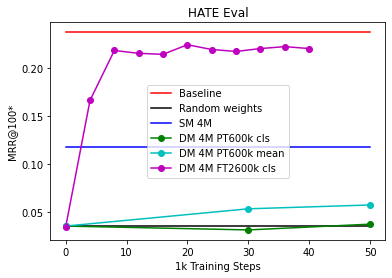

In [54]:
baseline = [(0, 0.237), (50, 0.237)]

random = [(0, 0.035), (50, 0.035)]

sm_4m_mean_pt = [(0, 0.117), (50, 0.117)]

dm_4m_cls_xe = [(0, 0.039), (16, 0.037)]

dm_4m_cls_pt = [(0, 0.035), (30, 0.031), (50, 0.037)]
dm_4m_mean_pt = [(0, 0.035), (30, 0.053), (50, 0.057)]

dm_4m_cls_cs = [(0, 0.034), (4, 0.166), (8, 0.218), (12, 0.215), (16, 0.214), (20, 0.224), (24, 0.219), (28, 0.217), (32, 0.220), (36, 0.222), (40, 0.220)]



plt.title('HATE Eval')
plt.xlabel('1k Training Steps')
plt.ylabel('MRR@100*')

plt.plot(*zip(*baseline), 'r', label='Baseline')

plt.plot(*zip(*random), 'k', label='Random weights')

plt.plot(*zip(*sm_4m_mean_pt), 'b', label='SM 4M')

# plt.plot(*zip(*dm_4m_cls_xe), 'y-o', label='DM 4M XE290k cls')

plt.plot(*zip(*dm_4m_cls_pt), 'g-o', label='DM 4M PT600k cls')
plt.plot(*zip(*dm_4m_mean_pt), 'c-o', label='DM 4M PT600k mean')

plt.plot(*zip(*dm_4m_cls_cs), 'm-o', label='DM 4M FT2600k cls')



plt.legend()
plt.show()

## 7.3 Document Matching

# **8.** End-to-End Pipelines

## 8.1 Training

In [55]:
def fit_doc_model(training_objective='pretrain', ranking_mode='cs', preembedded_hidden_size=128, hidden_size=128, hidden_layers=2, attention_heads=2, intermediate_size=512, embedding_mode='cls', ranking_loss_margin=0.25, load_weights_path=None, restart_from_checkpoint=False, dataset_version='large', epochs=20):
  """
  End-to-end function that receives the given parameters and trains the corresponding
  model given the training objective and the other parameters.

  Args:
    training_objective:
      'pretrain' or 'ranking'
    ranking_mode:
      'cs' for Cosine Similarity Model
      'ce' for Cross Encoder Model
    preembedded_hidden_size:
    hidden_size:
    hidden_layers: Set to 2 by default, number of encoder modules in the Transformer
    attention_heads: Set to 2 by default, must divide the intermediary size
    intermediary_size: Usually set to 4 times the size of hidden_size, must be divisible by the number of attention heads
    embedding_mode: Set to 'cls' by default, can also be 'mean' or 'sum'
    ranking_loss_margin: Set to 0.25 by default
    load_weights_path:
    restart_from_checkpoint: Only set to True if training was interrupted and you 
      want to pick up from a checkpoint, if you just want to load pretrained weights
      leave unchanged and only provide load_weights_path
    dataset_version:
    epochs:
  """

  save_name = f"DM_L-{hidden_layers}_H-{hidden_size}_A-{attention_heads}_E-{epochs}"

  config = HATEDocumentModelConfig(hidden_size=hidden_size, num_hidden_layers=hidden_layers, num_attention_heads=attention_heads, intermediate_size=intermediate_size)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  if training_objective == 'pretrain':
    if dataset_version == 'large':
      dataset_path = f'/content/drive/MyDrive/Bachelor/Thesis/datasets/wikipedia_preembedded_{preembedded_hidden_size}_600k/'
      pretrain_prefix = "PT_W-L_"
      save_name = pretrain_prefix + save_name
    elif dataset_version == 'small':
      dataset_path = f'/content/drive/MyDrive/Bachelor/Thesis/datasets/wikipedia_preembedded_{preembedded_hidden_size}_300k/'
      pretrain_prefix = "PT_W-S_"
      save_name = pretrain_prefix + save_name

    model = HATEDocumentModel(config, preembedded_hidden_size)

    if load_weights_path is not None:
      model = load_weights(model, load_weights_path, device)
    model.to(device)

    if restart_from_checkpoint:
      pretrain_doc_model(model, config, dataset_path, 64, epochs, save_name, load_weights_path)
    else:
      pretrain_doc_model(model, config, dataset_path, 64, epochs, save_name)


  elif training_objective == 'ranking':
    save_name = save_name + f"_M-{ranking_loss_margin}_{embedding_mode.upper()}"
    if dataset_version == 'large':
      dataset_path = f'/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/doctrain260k/'
      prefix = "FT_MS-L_"
    elif dataset_version == 'small':
      dataset_path = f'/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/doctrain130k/'
      prefix = "FT_MS-S_"
    
    if ranking_mode == 'cs':
      model = HATEDocumentModelCosineSimilarityRanking(config, preembedded_hidden_size, ranking_loss_margin)
      prefix = prefix + "CS_"
    elif ranking_mode == 'ce':
      model = HATEDocumentModelCrossEncoderRanking(config, preembedded_hidden_size, ranking_loss_margin)
      prefix = prefix + "CE_"


    if load_weights_path is not None:
      model = load_weights(model, load_weights_path, device)
    model.to(device)

    if load_weights_path is not None and "PT_W-L" in load_weights_path:
      prefix = "PT_W-L_" + prefix
    elif load_weights_path is not None and "PT_W-S" in load_weights_path:
      prefix = "PT_W-S_" + prefix

    save_name = prefix + save_name

    if restart_from_checkpoint:
      if ranking_mode == 'cs':
        finetune_msmarco_cosine_similarity(model, config, dataset_path, 32, epochs, save_name, load_weights_path)
      elif ranking_mode == 'ce':
        finetune_msmarco_cross_encoder(model, config, dataset_path, 64, epochs, save_name, load_weights_path)
    else:
      if ranking_mode == 'cs':
        finetune_msmarco_cosine_similarity(model, config, dataset_path, 32, epochs, save_name)
      elif ranking_mode == 'ce':
        finetune_msmarco_cross_encoder(model, config, dataset_path, 64, epochs, save_name)


  elif training_objective == 'matching':
    print("Implement Matching Task")

  total_params = sum(p.numel() for p in model.parameters())

## 8.2 Evaluation

Write all the trained modules in such a compact way that we can just hand it a document or sentence and it will infer its representation

In [56]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [57]:
def evaluate_doc_model(model_name, embedding_mode='cls', target_metric='MRR@20'):
  
  model_type = ''

  config_path = f'/content/drive/MyDrive/Bachelor/Thesis/checkpoints/{model_name}/{model_name}.pkl'
  directory = f'/content/drive/MyDrive/Bachelor/Thesis/checkpoints/{model_name}'

  with open(config_path, "rb") as config_file:
    config = pickle.load(config_file)

  if 'CE' in model_name:
    model_type = 'cross_encoder'
    model = HATEDocumentModelCrossEncoderRanking(config)
  else:
    model_type = 'cosine_similarity'
    model = HATEDocumentModelCosineSimilarityRanking(config)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  model.eval()
  model.to(device)

  eval_scores = []

  for i, checkpoint in enumerate(os.listdir(directory)):
    if checkpoint.endswith('.tar'):
      model = load_weights(model, f'{directory}/{checkpoint}', device)
      model.eval()
      model.to(device)
      if target_metric == 'MRR@20':
        mrr = evaluate_ranking_model(model, model_type, embedding_mode, dataset_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top20/docdev_top20_eval_small.pkl')
      elif target_metric == 'MRR@100':
        mrr = evaluate_ranking_model(model, model_type, embedding_mode, dataset_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top100_1000_queries/')
      print(f"{target_metric} at step {checkpoint}: ", mrr)
      eval_scores.append(mrr)

  with open(f'/content/drive/MyDrive/Bachelor/Thesis/checkpoints/{model_name}/{target_metric}-{embedding_mode}.pkl', 'wb') as e:
    pickle.dump(eval_scores, e)

In [58]:
def get_best_checkpoint(print_all_scores=False, test_on_mrr100=False, embedding_mode='cls'):
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  checkpoint_directory = '/content/drive/MyDrive/Bachelor/Thesis/checkpoints/'
  mrr100_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top100_1000_queries/'
  ranking_model_type = ''

  for model_name in os.listdir(checkpoint_directory):
    if 'V-1' not in model_name:
      if 'MRR@20.pkl' in os.listdir(f'{checkpoint_directory}{model_name}/'):
        with open(f'{checkpoint_directory}{model_name}/MRR@20.pkl', 'rb') as mrr_at_20:
          scores = pickle.load(mrr_at_20)
          print(f"{model_name}: Best MRR@20 {max(scores)} in S-{(scores.index(max(scores))+1)*1000}.tar after {len(scores)*1000} total training steps")
          if print_all_scores:
            print(scores, '\n')
          if test_on_mrr100:
            with open(f'{checkpoint_directory}{model_name}/{model_name}.pkl', 'rb') as c:
              ranking_config = pickle.load(c)
              if 'CE' in model_name:
                embedding_mode='cls'
                ranking_model = HATEDocumentModelCrossEncoderRanking(ranking_config)
                ranking_model_type = 'cross_encoder'
              else:
                ranking_model = HATEDocumentModelCosineSimilarityRanking(ranking_config)
                ranking_model_type = 'cosine_similarity'
                
              ranking_model = load_weights(ranking_model, f'{checkpoint_directory}{model_name}/S-{(scores.index(max(scores))+1)*1000}.tar', device)
              ranking_model.to(device)
              mrr100 = evaluate_ranking_model(ranking_model, ranking_model_type, embedding_mode, mrr100_filepath)
              print(f"Score on MRR@100*: {mrr100}\n")

## 8.3 Visualize

In [59]:
def plot_loss_eval_per_model(model_name, color, axis_1, axis_2, label, smoothing_factor=300):
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  checkpoint_directory = '/content/drive/MyDrive/Bachelor/Thesis/checkpoints/'
  mrr100_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top100_1000_queries/'
  model_name = model_name
  model_path = checkpoint_directory + model_name
  last_checkpoint = os.listdir(f'{model_path}')[-3:-2][0]
  eval_scores = os.listdir(f'{model_path}')[-1:][0]

  with open(f'{model_path}/{last_checkpoint}', 'rb') as cp:
    checkpoint = torch.load(cp, map_location=device)

    loss = []
    for loss_checkpoint in checkpoint['loss_history']:
      if not torch.is_tensor(loss_checkpoint) and 'loss_product' in loss_checkpoint.keys():
        loss.append(loss_checkpoint['loss_product'].item())
      else:
        loss.append(loss_checkpoint.item())

    
    smoothed_loss = []
    for i, value in enumerate(loss):
      if len(loss[:i]) > smoothing_factor:
        smoothed_loss.append(sum(loss[:i][-smoothing_factor:])/smoothing_factor)
      else:
        smoothed_loss.append(value)
    axis_1.plot(smoothed_loss, color, label=label)

  with open(f'{model_path}/{eval_scores}', 'rb') as e:
    eval_scores_list = pickle.load(e)
    scale = list(range(len(eval_scores_list)))
    for i in scale:
      scale[i] = scale[i]*1000
    axis_2.plot(scale, eval_scores_list, color, label=label)


In [60]:
def plot_loss_eval_per_hidden_size(hidden_size=128):

  colors = ['gray', 'indianred', 'cadetblue', 'burlywood', 'mediumslateblue']

  fig, (ax1,ax2) = plt.subplots(1,2)
  fig.set_figwidth(15)
  #ax2 = ax1.twinx()

  ax1.set_xlabel('Training Steps (1k)')
  ax1.set_ylabel('Loss', color='black')
  ax1.set_yscale('log')
  ax1.legend(loc='upper right')
  ax2.set_ylabel('Eval MRR@20', color='black')
  ax2.axhline(y=0.126, color='black', linestyle=':')
  ax2.axhline(y=0.292, color='black', linestyle='--')
  ax2.legend(loc='lower right')

  model_names = os.listdir('/content/drive/MyDrive/Bachelor/Thesis/checkpoints/')

  model_names = [name for name in model_names if f'{hidden_size}' in name and 'L-4' not in name]

  for i, model in enumerate(model_names):
    if 'PT' in model and 'FT' not in model:
      color = colors[0]
      label = "PT"
    elif 'PT' in model and 'CS' in model:
      color = colors[1]
      label = "PT+CS"
    elif 'PT' in model and 'CE' in model:
      color = colors[2]
      label = "PT + XE"
    elif 'PT' not in model and 'CS' in model:
      color = colors[3]
      label = "CS"
    elif 'PT' not in model and 'CE' in model:
      color = colors[4]
      label = "XE"
    plot_loss_eval_per_model(model, color, ax1, ax2, label)

  plt.legend()
  plt.show()
  

In [61]:
def display_pca_scatterplot_3D(first_text_pt, first_text_list, second_text_pt, second_text_list, single_sentences_pt=None, single_sentences_list=None):
  
  first_text_np = first_text_pt.cpu().detach().numpy()
  second_text_np = second_text_pt.cpu().detach().numpy()


  first_text_three_dim = PCA(random_state=0).fit_transform(first_text_np)[:,:3]
  second_text_three_dim = PCA(random_state=0).fit_transform(second_text_np)[:,:3]

  if single_sentences_pt is not None:
    single_sentences_np = single_sentences_pt.cpu().detach().numpy()
    sentences_three_dim = PCA(random_state=0).fit_transform(single_sentences_np)[:,:3]
    print(second_text_three_dim)

  data = []
  count = 0

  # Compute Coordinates for first text
  trace_input = go.Scatter3d(
                    x = first_text_three_dim[count:,0], 
                    y = first_text_three_dim[count:,1],  
                    z = first_text_three_dim[count:,2],
                    text = first_text_list[count:],
                    name = 'Potato Chips Contextualized',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'orange'
                    }
                    )
  
  data.append(trace_input)


  # Compute Coordinates for second text
  trace_input = go.Scatter3d(
                    x = second_text_three_dim[0:,0], 
                    y = second_text_three_dim[0:,1],  
                    z = second_text_three_dim[0:,2],
                    text = second_text_list[count:],
                    name = 'CPU Chips Contextualized',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'grey'
                    }
                    )
  
  data.append(trace_input)


  # Compute Coordinates for single sentences
  if single_sentences_pt is not None:
    trace_input = go.Scatter3d(
                    x = sentences_three_dim[0:,0], 
                    y = sentences_three_dim[0:,1],  
                    z = sentences_three_dim[0:,2],
                    text = single_sentences_list[count:],
                    name = 'Uncontextualized sentence',
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 10,
                        'opacity': 1,
                        'color': 'green'
                    }
                    )
    data.append(trace_input)


  # Configure the layout
  layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=25,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 15),
        autosize = False,
        width = 1000,
        height = 1000
        )


  plot_figure = go.Figure(data = data, layout = layout)
  plot_figure.show()

## 8.4 Execute

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Apr 14 17:42:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    37W / 250W |   3713MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
fit_doc_model(training_objective='ranking', ranking_mode='ce')#, load_weights_path='/content/drive/MyDrive/Bachelor/Thesis/checkpoints/PT_W-L_DM_L-4_H-128_A-4_E-20/S-36000.tar')

In [94]:
evaluate_doc_model(model_name='PT_W-L_FT_MS-L_CS_DM_L-4_H-128_A-4_E-20_M-0.25_CLS', embedding_mode='cls', target_metric='MRR@100')

MRR@100 at step S-1000.tar:  0.15749410290997087
MRR@100 at step S-2000.tar:  0.18312653651102692
MRR@100 at step S-3000.tar:  0.19268099553389967
MRR@100 at step S-4000.tar:  0.18881303494758206
MRR@100 at step S-5000.tar:  0.22235497914735897
MRR@100 at step S-6000.tar:  0.2247564088150094
MRR@100 at step S-7000.tar:  0.22957394526816888
MRR@100 at step S-8000.tar:  0.22872143300557524
MRR@100 at step S-9000.tar:  0.22544187255509607
MRR@100 at step S-10000.tar:  0.20346507440482867
MRR@100 at step S-11000.tar:  0.1982552455241597
MRR@100 at step S-12000.tar:  0.203421667690005
MRR@100 at step S-13000.tar:  0.22623414879364373
MRR@100 at step S-14000.tar:  0.23008568207592348
MRR@100 at step S-15000.tar:  0.23807715991511977
MRR@100 at step S-16000.tar:  0.23393173545030968
MRR@100 at step S-17000.tar:  0.2204412709056336
MRR@100 at step S-18000.tar:  0.2240966827241066
MRR@100 at step S-19000.tar:  0.222599765304642
MRR@100 at step S-20000.tar:  0.205839459397016
MRR@100 at step S-2

In [ ]:
get_best_checkpoint(test_on_mrr100=True)

PT_W-L_DM_L-2_H-128_A-2_E-20: Best MRR@20 0.2275225647417598 in S-7000.tar after 187000 total training steps
PT_W-L_DM_L-2_H-64_A-2_E-20: Best MRR@20 0.24425609018604377 in S-9000.tar after 60000 total training steps
PT_W-L_DM_L-2_H-16_A-2_E-20: Best MRR@20 0.1958400849064936 in S-3000.tar after 37000 total training steps
PT_W-L_DM_L-2_H-32_A-2_E-20: Best MRR@20 0.22100434924552573 in S-9000.tar after 38000 total training steps
FT_MS-L_CS_DM_L-2_H-16_A-2_E-20: Best MRR@20 0.3137527460413684 in S-50000.tar after 136000 total training steps
FT_MS-L_CS_DM_L-2_H-32_A-2_E-20: Best MRR@20 0.3097533154066436 in S-33000.tar after 42000 total training steps
FT_MS-L_CS_DM_L-2_H-64_A-2_E-20: Best MRR@20 0.3140990579939496 in S-48000.tar after 49000 total training steps
FT_MS-L_CS_DM_L-2_H-128_A-2_E-20: Best MRR@20 0.398018890165562 in S-79000.tar after 126000 total training steps
PT_W-L_FT_MS-L_CS_DM_L-2_H-128_A-2_E-20: Best MRR@20 0.3962868231355848 in S-128000.tar after 151000 total training st

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

ranking_config = HATEDocumentModelConfig()
ranking_model = HATEDocumentModelCosineSimilarityRanking(ranking_config)
#ranking_model = load_weights(ranking_model, '/content/drive/MyDrive/Bachelor/Thesis/checkpoints/FT_MS-L_DM_L-2_H-64_A-2_E-20/S-49000.tar', device)
ranking_model.to(device)

mrr = evaluate_ranking_model(ranking_model, 'cosine_similarity', 'cls', dataset_filepath='/content/drive/MyDrive/Bachelor/Thesis/datasets/ms_marco/docdev_top100_1000_queries/') 
print(mrr)

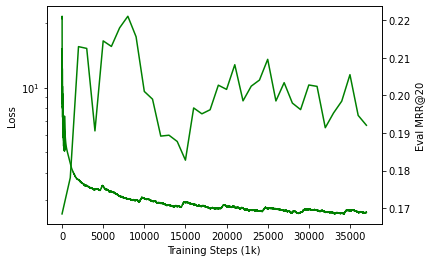

In [70]:
plot_loss_eval_per_model('PT_W-L_DM_L-2_H-32_A-2_E-20')

In [46]:
import matplotlib

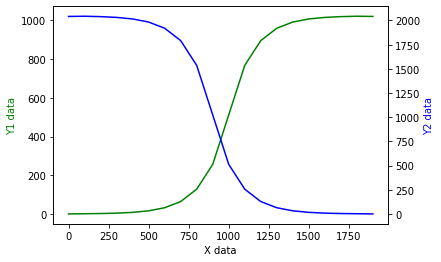

In [52]:
points = [0,1,2,4,8,16,32,64,128,256,512,768,896,960,992,1008,1016,1020,1022,1021]
points_scaled = [i*2 for i in points]
points_scaled.reverse()

scale = list(range(20))
for i in scale:
  scale[i] = scale[i]*100

comparison = list(range(200))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(scale, points, 'g-')
ax2.plot(scale, points_scaled, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

# plt.plot(comparison)
# plt.plot(scale, points)
# plt.plot(scale, points_scaled)

In [ ]:
###############
# TENSORBOARD #
###############

%load_ext tensorboard
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

%tensorboard --logdir '/content/drive/MyDrive/Bachelor/Thesis/logs/'

# **9.** Outlook

- Deeper look at attention: transformers are graph neural networks https://thegradient.pub/transformers-are-graph-neural-networks/
- Generalization to Hopfield Nets: (1) https://ml-jku.github.io/hopfield-layers/ (2) http://franksworld.com/2020/08/10/explaining-the-paper-hopfield-networks-is-all-you-need/ (3) https://analyticsindiamag.com/modern-hopfield-network-transformers-attention/ (4) https://towardsdatascience.com/hopfield-networks-are-useless-heres-why-you-should-learn-them-f0930ebeadcd
- Implications of these findings for language representation?
- Check http://nlp.seas.harvard.edu/code/ for more ideas
- Reducing time-complexity of Attention